# M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS

### **GESTIÓN y PROCESAMIENTO DE BASE DE DATOS y NOCIONES DE AUDITORÍA NO PRESENCIAL**




**Actividad Final**

# **Consignas**
Contrastar el proceso de generación y características de cumplimiento de regulaciones con la
información contenida en el conjunto de datos de trabajo

# **Datos**

Se debe contemplar:
- El documento citado como referencia para el archivo de datos,
- La ley 26.951, sus modificaciones y reglamentación,
- Agregar una columna adicional a los datos, generada a través de una distribución Bi(1;0,075), para indicar inclusión en el registro “No llame”.

## - Documento citado como referencia para el archivo de datos

Subimos el zip descargado de la pagina al drive: https://archive.ics.uci.edu/dataset/222/bank+marketing


In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Definir el file_id para poder conectar al archivo. Este id se obtiene a partir de la URL que se genera al compartir el archivo con TODOS desde el Drive propio (luego de compartir -> Get Link).
# URL obtenida fue: https://drive.google.com/file/d/1_4P_UbWusoS9u5w4lIFgCvABMreWDrsj/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1_4P_UbWusoS9u5w4lIFgCvABMreWDrsj'})

In [4]:
# Se descarga el archivo.
fileDownloaded.GetContentFile('bank-names.csv')

In [5]:
texto=open("/content/bank-names.csv", mode="r")

In [6]:
print(texto.read())

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European S

## - La ley 26.951, sus modificaciones y reglamentación

http://servicios.infoleg.gob.ar/infolegInternet/anexos/230000-234999/233066/norma.htm

https://www.argentina.gob.ar/normativa/nacional/ley-26951-233066/normas-modifican


# **Base de datos**

Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas.
Muchas veces era necesario más de un contacto con un mismo cliente, para poder acceder si el producto ((bank term deposit)) estaría ('yes') o ('no') suscrito.

En este link se pueden obtener mas datos respecto de las variables explicativas que conforman el dataset X y de la variable target y : https://archive.ics.uci.edu/dataset/222/bank+marketing  

# **1) Importacion de los datos**




In [7]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [8]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
# Definir el file_id para poder conectar al archivo. Este id se obtiene a partir de la URL que se genera al compartir el archivo con TODOS desde el Drive propio (luego de compartir -> Get Link).
# URL obtenida fue: https://drive.google.com/file/d/1f44yeyKgNPNBWEGcQ6xLvDuDs_aYJeKX/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1f44yeyKgNPNBWEGcQ6xLvDuDs_aYJeKX'})

In [10]:
# Se descarga el archivo.
fileDownloaded.GetContentFile('bank-full.csv')

In [11]:
import pandas as pd
data=pd.read_csv('/content/bank-full.csv', sep =";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
data.shape

(45211, 17)

In [13]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# **2) Creacion de nueva variable**


In [15]:
from numpy import random

random.seed(2024) #se setear una semilla para que siempre obtener la misma generación aletoria

for i,row in data.iterrows():
      data.at[i,'No_llame']= random.binomial(n = 1, p =0.075, size = 1)[0]

#la función random.binomial devuleve un array, por eso se le indica [0] para que solo devuelva el valor generado

In [16]:
data.groupby(['No_llame']).No_llame.agg('count')

No_llame
0.0    41772
1.0     3439
Name: No_llame, dtype: int64

In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.0


In [18]:
#se valida que se haya generado bien la nueva variable
print(data['No_llame'].describe())

count    45211.000000
mean         0.076066
std          0.265106
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No_llame, dtype: float64


# **3) Analisis Exploratorio**


In [19]:
#Se comienza con profiling report
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8e0fd8647367f17d03a5a800989dfcf4ae407bab20329f9c8b0e7f8bc72f046c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [20]:
#importar librería
from ydata_profiling import ProfileReport

In [21]:
profile=ProfileReport(data, title="Profiling Report") #se genera
profile.to_file('Profiling.html') #se exporta para no cargar el colab

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous      No_llame  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.076066  
std      100.128746      2.303441      0.265106  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.00

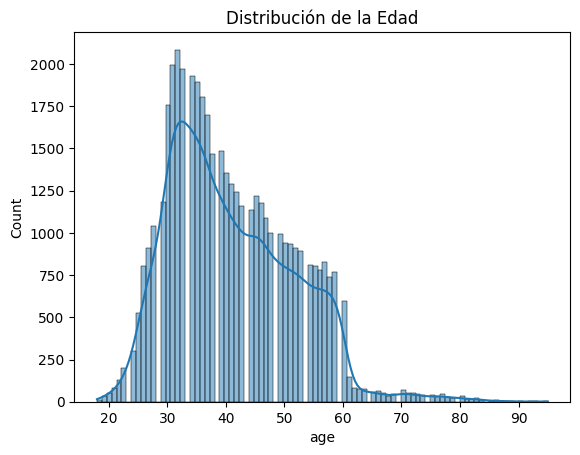

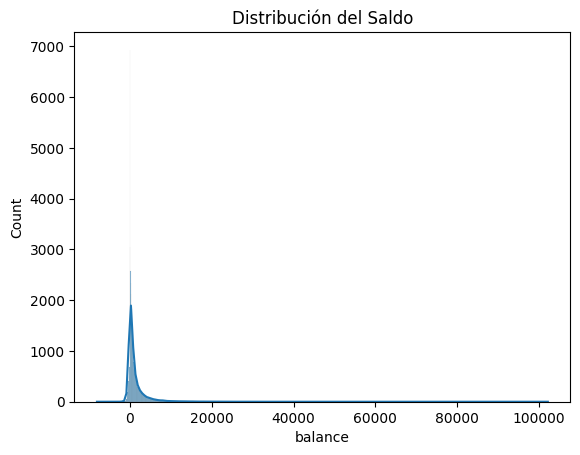

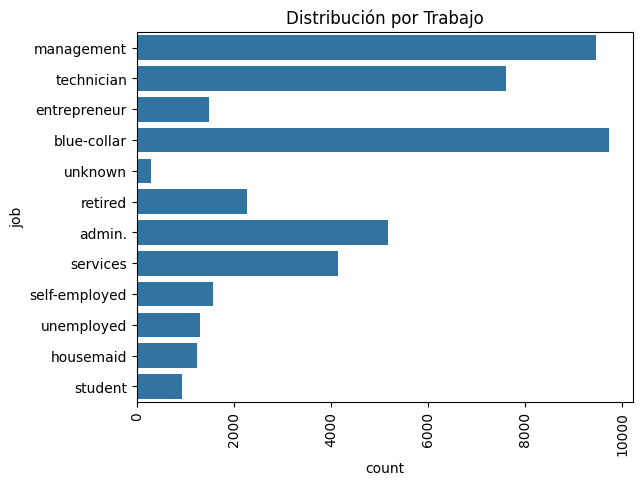

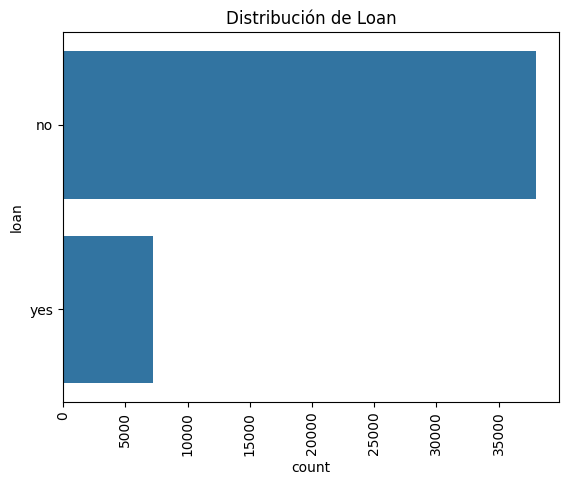

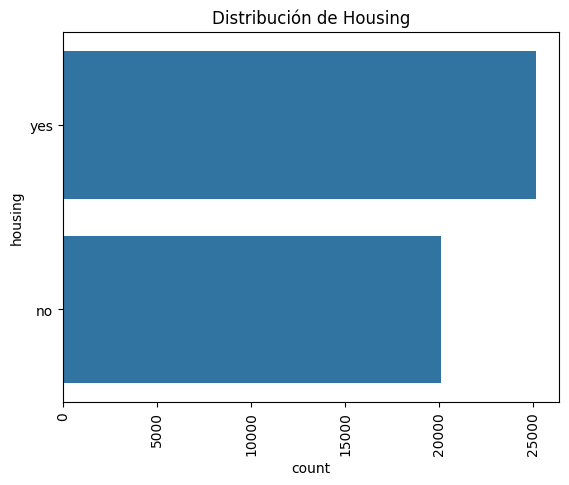

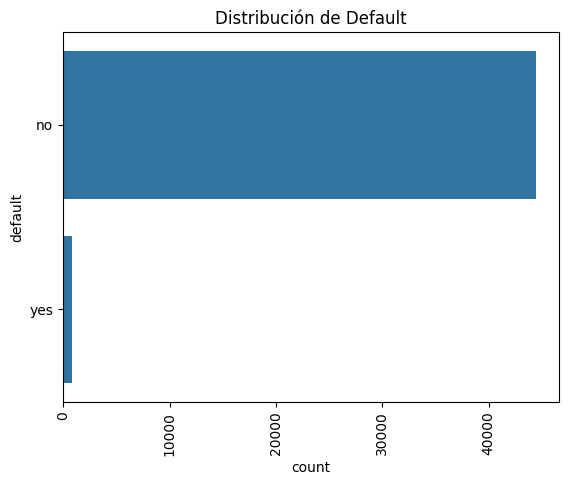

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
#Se hace un analisis descriptivo de algunas variables puntuales
# Resumen estadístico de las variables numericas
print(data.describe())

# Ver la distribución de la edad
sns.histplot(data['age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Ver la distribución del saldo
sns.histplot(data['balance'], kde=True)
plt.title('Distribución del Saldo')
plt.show()

# Ver la distribución por trabajo
sns.countplot(y=data['job'])
plt.title('Distribución por Trabajo')
plt.xticks(rotation=90)
plt.show()


# Ver la distribución por Loan
sns.countplot(y=data['loan'])
plt.title('Distribución de Loan')
plt.xticks(rotation=90)
plt.show()


# Ver la distribución por Housing
sns.countplot(y=data['housing'])
plt.title('Distribución de Housing')
plt.xticks(rotation=90)
plt.show()


# Ver la distribución por Default
sns.countplot(y=data['default'])
plt.title('Distribución de Default')
plt.xticks(rotation=90)
plt.show()

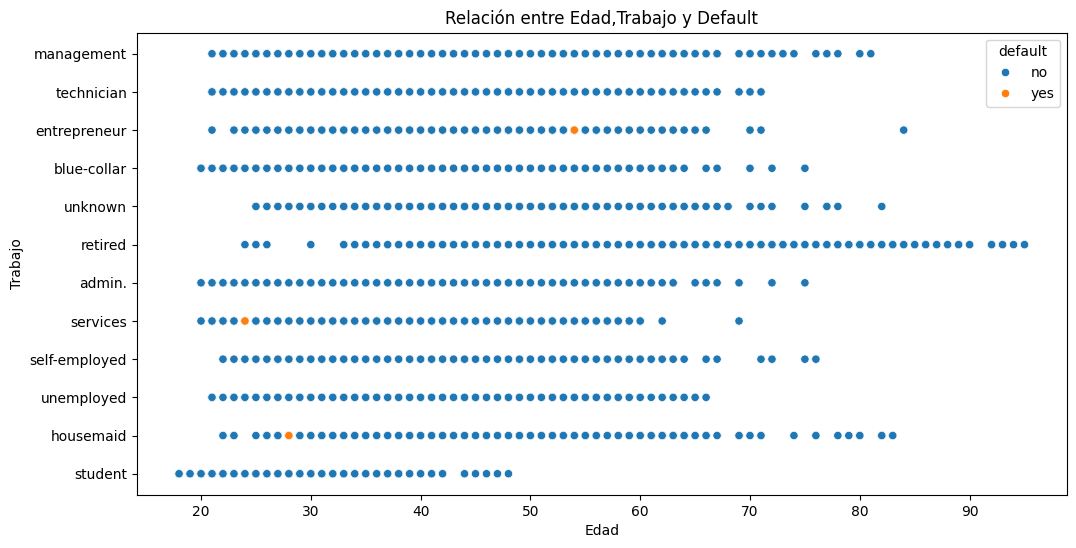

In [23]:
#Ver la edad y la variable default que mide si ya posee algun credito en default en relacion al el tipo de trabajo que tiene
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar
#Graficamos en la escala original
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='job', hue='default', data=data)
plt.title('Relación entre Edad,Trabajo y Default')
plt.xlabel('Edad')
plt.ylabel('Trabajo')
plt.show()

# Mostrar el gráfico
plt.show()

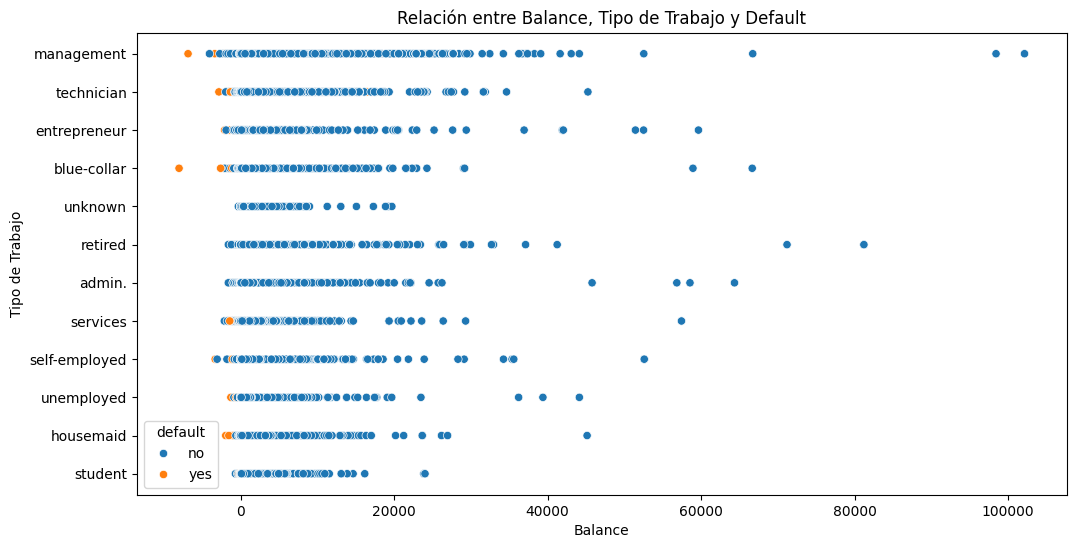

In [24]:
# Graficar el balance en relacion al tipo de trabajo y la variable 'default'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='job', hue='default', data=data)
plt.title('Relación entre Balance, Tipo de Trabajo y Default')
plt.xlabel('Balance')
plt.ylabel('Tipo de Trabajo')
plt.show()

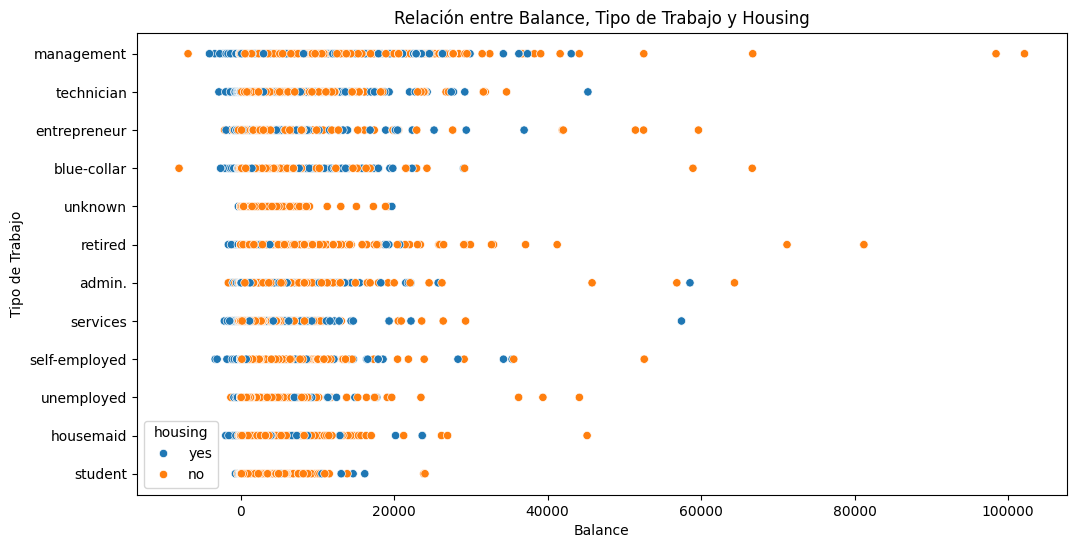

In [25]:
# Graficar el balance en relacion al tipo de trabajo y la variable 'housing'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='job', hue='housing', data=data)
plt.title('Relación entre Balance, Tipo de Trabajo y Housing')
plt.xlabel('Balance')
plt.ylabel('Tipo de Trabajo')
plt.show()

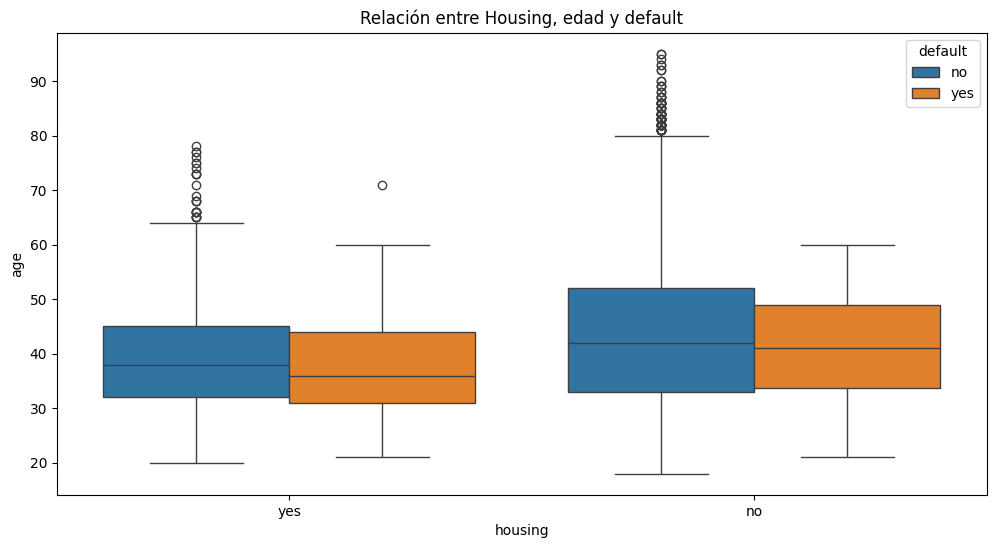

In [26]:
#Se verifca la distribucion de los datos segun edad, personas que tengan creditos hipotecarios, clasificados por default
plt.figure(figsize=(12, 6))
sns.boxplot(x='housing', y='age', hue='default', data=data)
plt.title('Relación entre Housing, edad y default')
plt.xlabel('housing')
plt.ylabel('age')
plt.show()

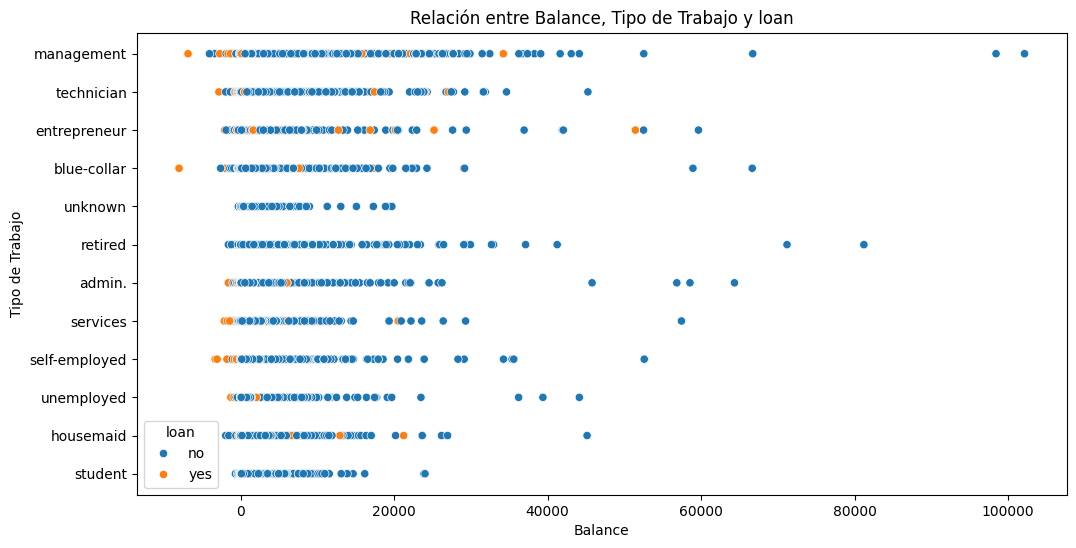

In [27]:
# Graficar el balance en relacion al tipo de trabajo y la variable 'loan'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='job', hue='loan', data=data)
plt.title('Relación entre Balance, Tipo de Trabajo y loan')
plt.xlabel('Balance')
plt.ylabel('Tipo de Trabajo')
plt.show()

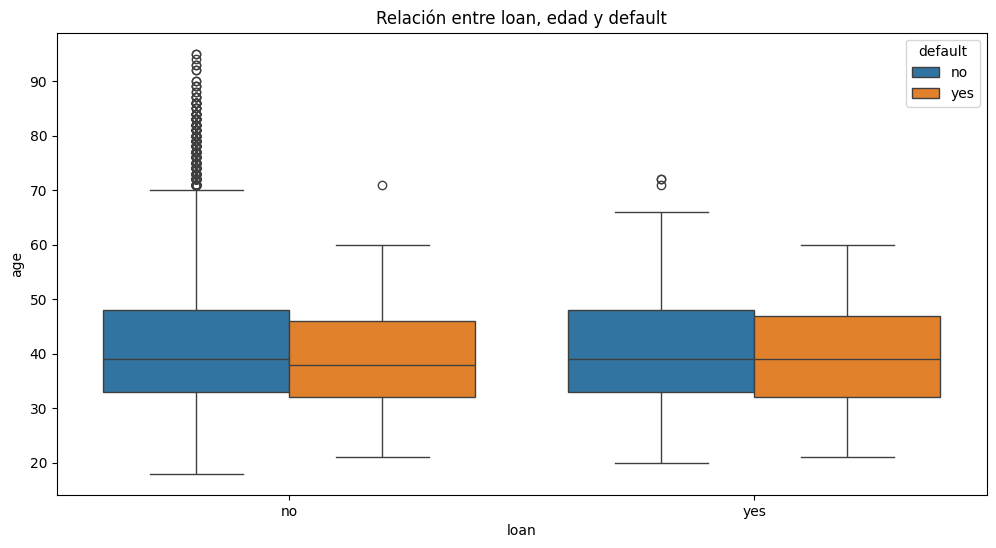

In [28]:
#Se verifca la distribucion de los datos segun edad, personas que tengan creditos personales, clasificados por default
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan', y='age', hue='default', data=data)
plt.title('Relación entre loan, edad y default')
plt.xlabel('loan')
plt.ylabel('age')
plt.show()

# **4) Calidad de los datos**

Objetivos calidad de datos:

**- Completitud:**
Verificar si hay datos faltantes

**- Validez: Analisis de datos atipicos.**

Primero se analizan los valores atipicos llamados "unknown" en el conjunto de datos.


Luego se analiza en terminos de enfoque del problema datos que pueden ser considerado atipicos como ofrecer un deposito a usuarios que tienen balances anuales menores a 0, al menos un credito en default y estan desempleados.

1. Datos en donde el balance es menor a 0
2. Datos en donde los usuarios tienen al menos un credito en default
3. Datos en donde los usuarios estan desempleados

**- Consistencia: Porcentaje de datos con diferencias**.

Existe alguna diferencia entre datos que representan un mismo aspecto de un tema?

Se verifica como se comportan los datos de los 3 tipos de trabajo mas comunes para:
1. El set de datos completo
2. Los datos en donde los usuarios tienen balance menor a 0
3. Los datos en donde los usuarios tienen al menos 1 credito en default

**- Precisión: Porcentaje de datos que tienen diferencias con respecto a un patrón**

Se comparan los resultados con respecto a la media de la edad para:
1. El set de datos completo
2. Los datos en donde los usuarios tienen balance menor a 0
3. Los datos en donde los usuarios tienen al menos 1 credito en default
4. Datos en donde los usuarios estan desempleados

## **Completitud**

In [29]:
# Verificar valores nulos en cada columna
missing_values = data.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
No_llame     0
dtype: int64


No hay datos faltantes

## **Validez**

Primero analizamos los valores unknown dentro del set de datos


In [30]:
# Verificar valores únicos en cada columna
unique_values = data.nunique()
print(unique_values)

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
No_llame        2
dtype: int64


In [31]:
# Contar valores 'unknown' en las columnas relevantes
unknown_values_job = data['job'].value_counts().get('unknown', 0)
unknown_values_education = data['education'].value_counts().get('unknown', 0)
unknown_values_contact = data['contact'].value_counts().get('unknown', 0)
unknown_values_poutcome = data['poutcome'].value_counts().get('unknown', 0)

unknown_values = {
    'job_unknown': unknown_values_job,
    'education_unknown': unknown_values_education,
    'contact_unknown': unknown_values_contact,
    'poutcome_unknown': unknown_values_poutcome,
}

print(unknown_values)

{'job_unknown': 288, 'education_unknown': 1857, 'contact_unknown': 13020, 'poutcome_unknown': 36959}


Valores unknown: La presencia de valores unknown en las columnas job, education, contact y poutcome representa una deficiencia significativa, ya que implica datos faltantes o no clasificados.

Posibles inconsistencias en la columna education: La categoría unknown en education afecta la integridad de los datos, ya que la educación es una variable importante y su ausencia puede sesgar los resultados.

**Datos con balance menor a 0**

In [33]:
#Se analizan las mismas variables en los casos en que el usuario tiene balance menor a cero

df_balance = data[data['balance']< 0]
df_balance.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no,0.0
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no,0.0
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no,0.0
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no,0.0
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no,0.0


In [34]:
#Se hace un profiling report del dataset que contiene observaciones con balance menor a 0
profile2=ProfileReport(df_balance, title="Profiling Report Balance") #se genera
profile2.to_file('Profiling_Balance.html') #se exporta para no cargar el colab

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
df_balance.shape

(3766, 18)

               age      balance          day     duration     campaign  \
count  3766.000000  3766.000000  3766.000000  3766.000000  3766.000000   
mean     39.480351  -317.677642    16.439724   252.096389     2.926713   
std       9.068517   368.994983     8.578670   250.280003     3.474046   
min      20.000000 -8019.000000     1.000000     4.000000     1.000000   
25%      32.000000  -422.000000     9.000000   105.000000     1.000000   
50%      38.000000  -230.000000    16.000000   176.000000     2.000000   
75%      46.000000   -93.000000    24.000000   305.000000     3.000000   
max      63.000000    -1.000000    31.000000  3253.000000    43.000000   

             pdays     previous     No_llame  
count  3766.000000  3766.000000  3766.000000  
mean     35.314126     0.406798     0.071163  
std      99.970675     1.609466     0.257131  
min      -1.000000     0.000000     0.000000  
25%      -1.000000     0.000000     0.000000  
50%      -1.000000     0.000000     0.000000  
75% 

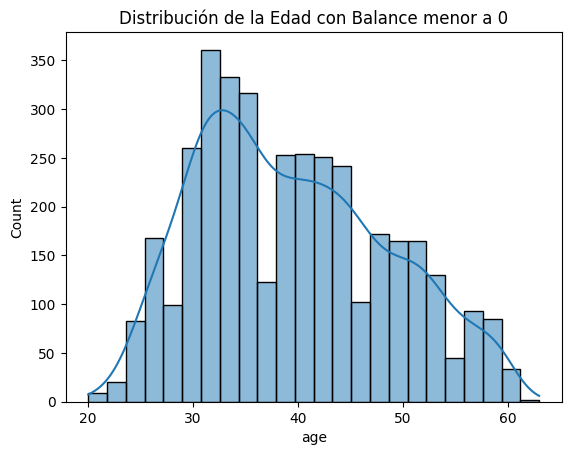

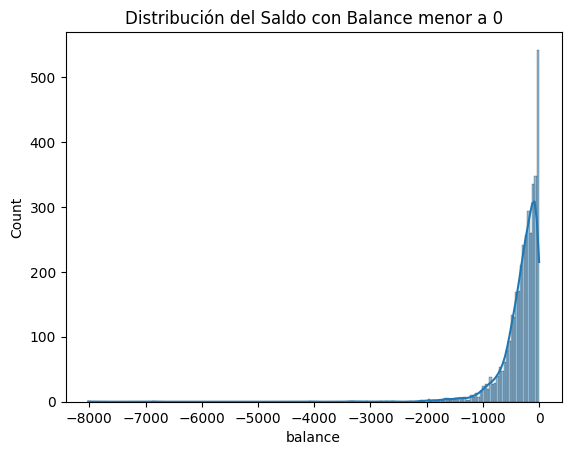

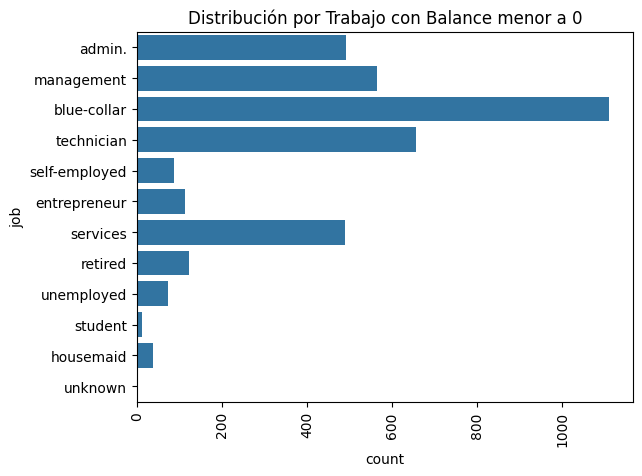

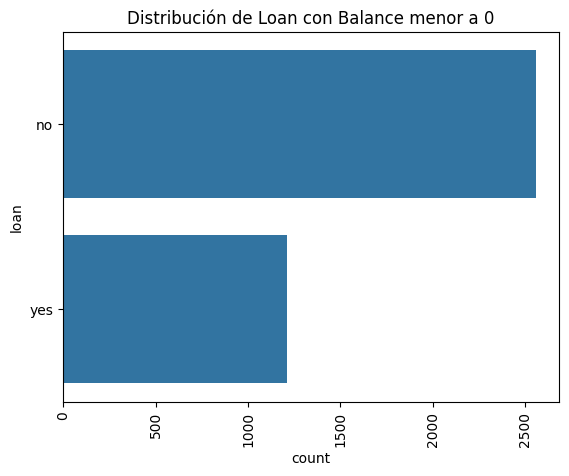

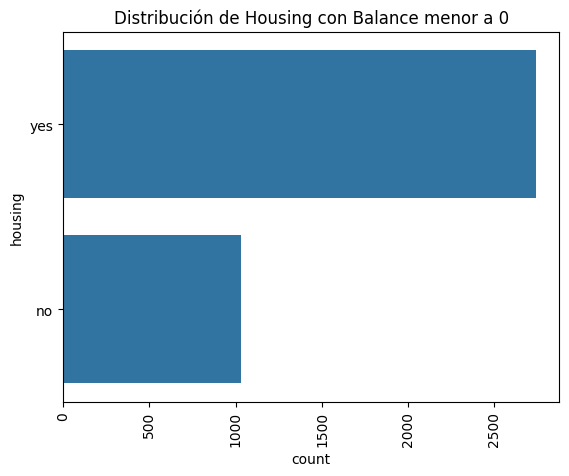

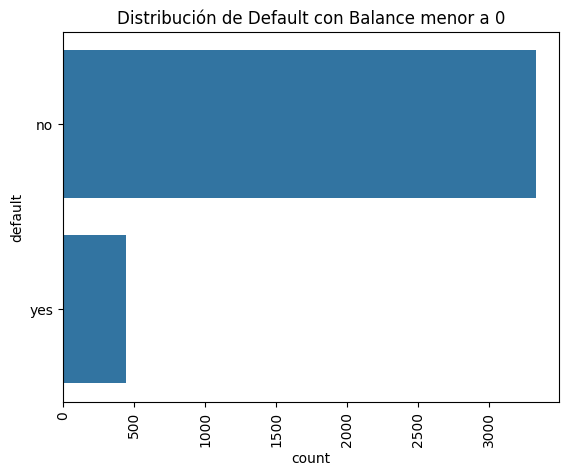

In [36]:
# Resumen estadístico de las variables filtradas por balance menor a 0
print(df_balance.describe())

# Ver la distribución de la edad
sns.histplot(df_balance['age'], kde=True)
plt.title('Distribución de la Edad con Balance menor a 0')
plt.show()

# Ver la distribución del saldo
sns.histplot(df_balance['balance'], kde=True)
plt.title('Distribución del Saldo con Balance menor a 0')
plt.show()

# Ver la distribución por trabajo
sns.countplot(y=df_balance['job'])
plt.title('Distribución por Trabajo con Balance menor a 0')
plt.xticks(rotation=90)
plt.show()


# Ver la distribución por Loan
sns.countplot(y=df_balance['loan'])
plt.title('Distribución de Loan con Balance menor a 0')
plt.xticks(rotation=90)
plt.show()


# Ver la distribución por Housing
sns.countplot(y=df_balance['housing'])
plt.title('Distribución de Housing con Balance menor a 0')
plt.xticks(rotation=90)
plt.show()

# Ver la distribución por Default
sns.countplot(y=df_balance['default'])
plt.title('Distribución de Default con Balance menor a 0')
plt.xticks(rotation=90)
plt.show()

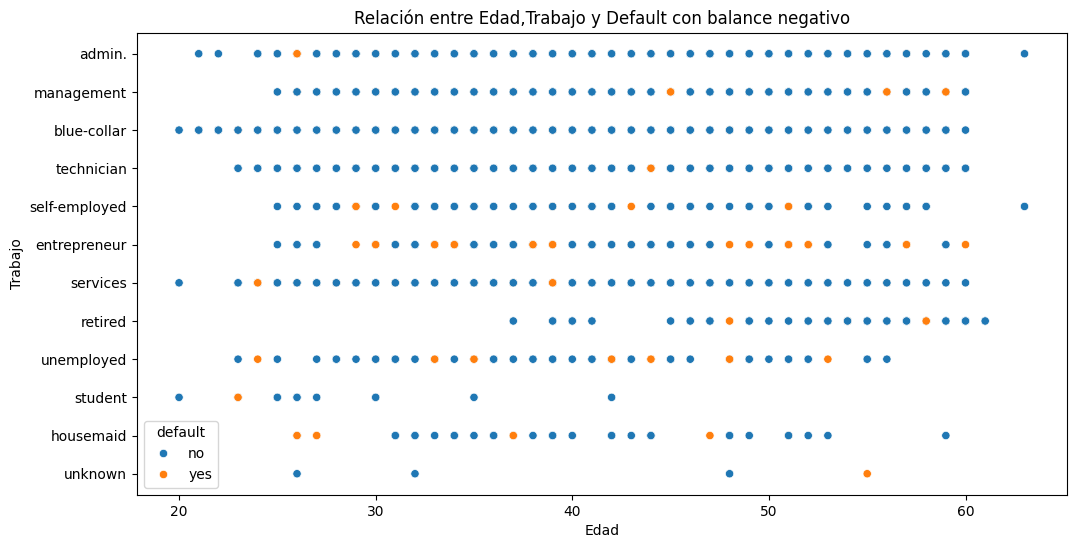

In [37]:
# Graficar la relación entre la edad, el tipo de trabajo y la variable 'default' de las observaciones que tienen balance negativo

plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='job', hue='default', data=df_balance)
plt.title('Relación entre Edad,Trabajo y Default con balance negativo')
plt.xlabel('Edad')
plt.ylabel('Trabajo')
plt.show()

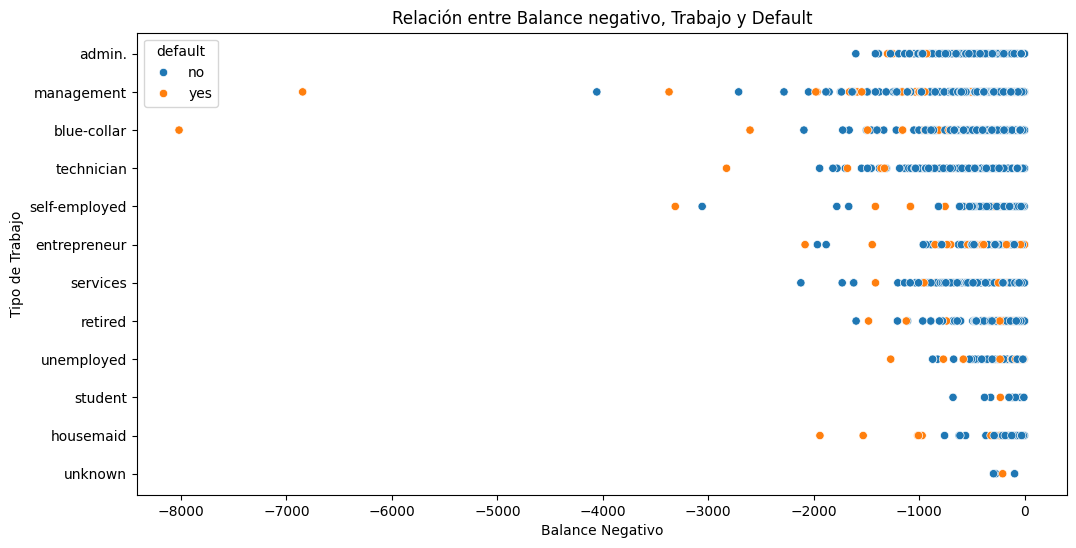

In [38]:
# Relación entre Balance negativo, Trabajo y Default
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='job', hue='default', data=df_balance)
plt.title('Relación entre Balance negativo, Trabajo y Default')
plt.xlabel('Balance Negativo')
plt.ylabel('Tipo de Trabajo')
plt.show()

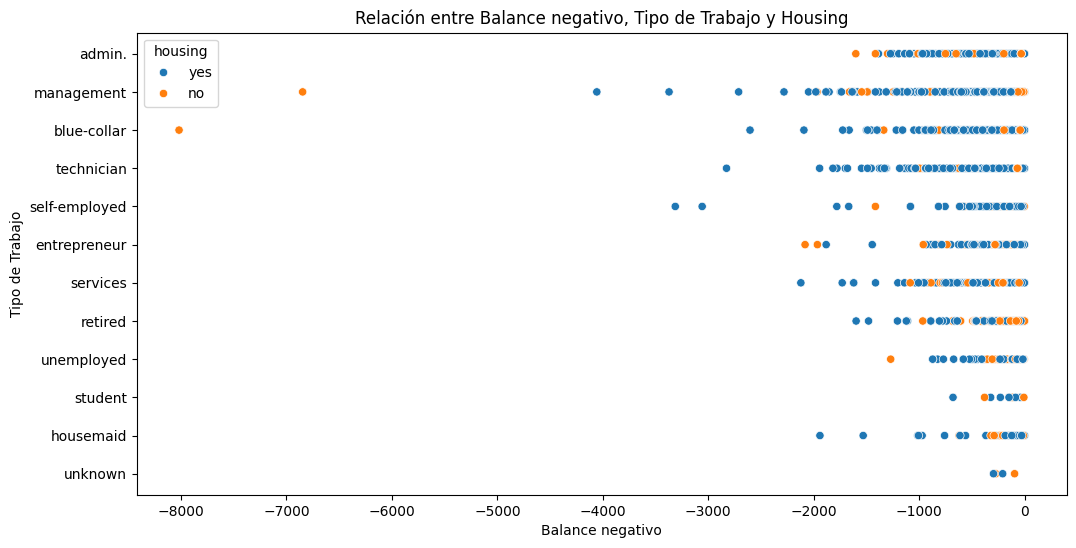

In [39]:
# Graficar el balance negativo en relacion al tipo de trabajo y la variable 'housing'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='job', hue='housing', data=df_balance)
plt.title('Relación entre Balance negativo, Tipo de Trabajo y Housing')
plt.xlabel('Balance negativo')
plt.ylabel('Tipo de Trabajo')
plt.show()

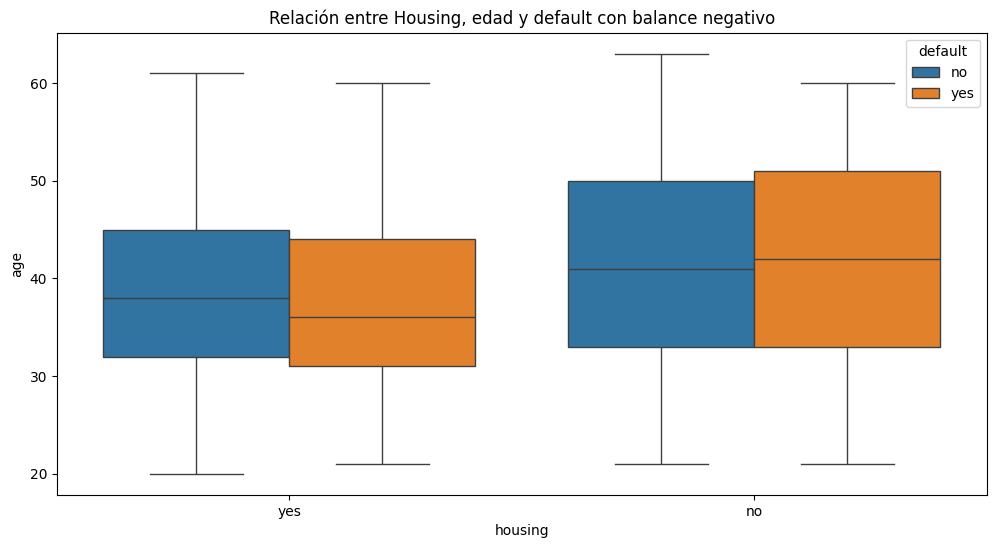

In [40]:
#Se verifca la distribucion de los datos segun edad, personas que tengan creditos hipotecarios, clasificados por default y que tengan balance negativo
plt.figure(figsize=(12, 6))
sns.boxplot(x='housing', y='age', hue='default', data=df_balance)
plt.title('Relación entre Housing, edad y default con balance negativo')
plt.xlabel('housing')
plt.ylabel('age')
plt.show()

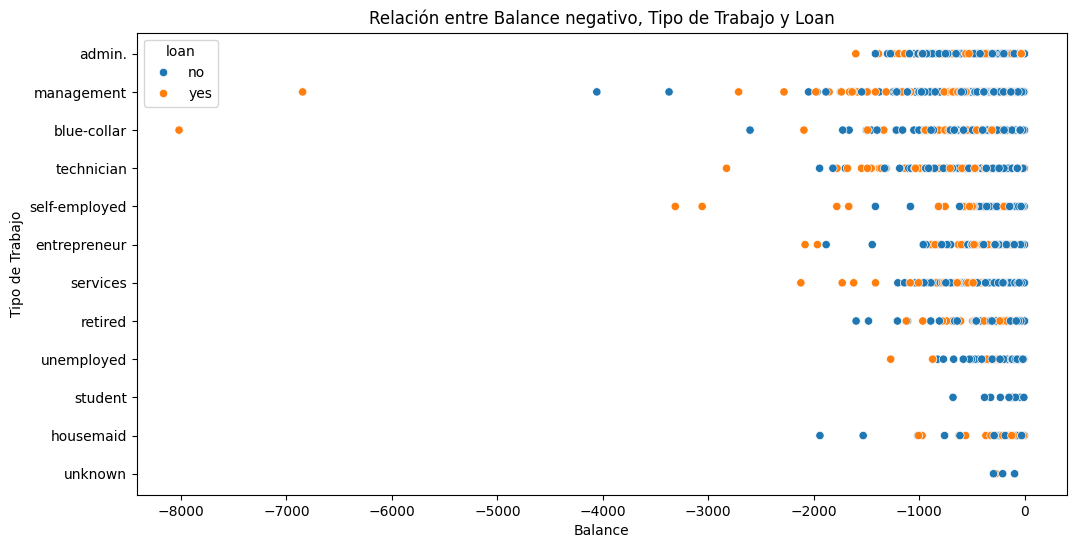

In [41]:
# Graficar el balance negativo en relacion al tipo de trabajo y la variable 'loan'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='job', hue='loan', data=df_balance)
plt.title('Relación entre Balance negativo, Tipo de Trabajo y Loan')
plt.xlabel('Balance')
plt.ylabel('Tipo de Trabajo')
plt.show()

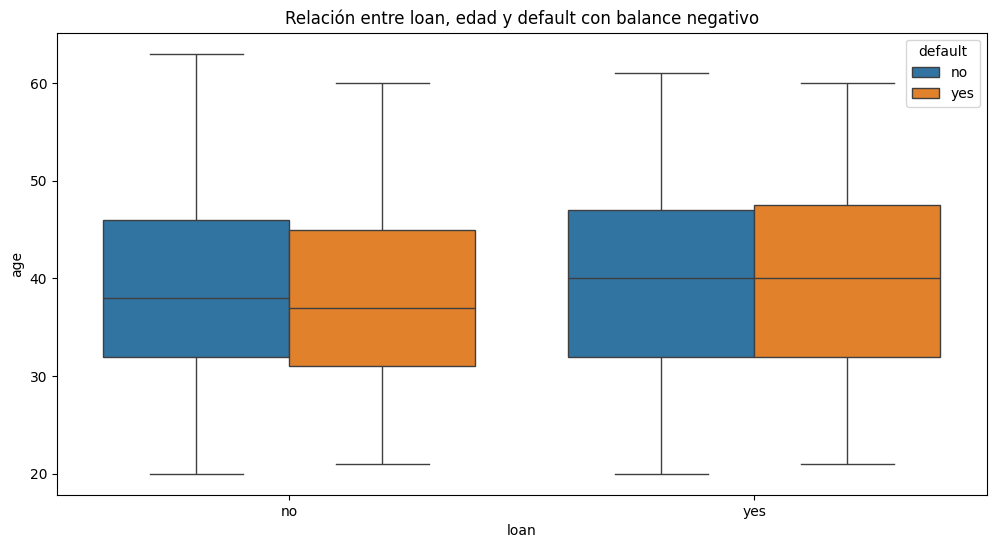

In [42]:
#Se verifca la distribucion de los datos segun edad, personas que tengan creditos personales, clasificados por default y que tengan balance negativo
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan', y='age', hue='default', data=df_balance)
plt.title('Relación entre loan, edad y default con balance negativo')
plt.xlabel('loan')
plt.ylabel('age')
plt.show()

**Datos con default = 'yes'**


In [43]:
#Se analizan las mismas variables en los casos en que el usuario tiene default = yes

df_default = data[data['default']== 'yes']
df_default.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0.0
79,55,services,divorced,secondary,yes,1,yes,no,unknown,5,may,208,1,-1,0,unknown,no,0.0
338,51,admin.,single,secondary,yes,-2,no,no,unknown,5,may,402,3,-1,0,unknown,no,0.0
419,33,technician,married,secondary,yes,72,yes,no,unknown,6,may,623,1,-1,0,unknown,no,1.0
458,33,blue-collar,single,secondary,yes,-60,no,no,unknown,6,may,243,1,-1,0,unknown,no,0.0


In [44]:
#Se hace un profiling report del dataset que contiene observaciones con default = Yes
profile3=ProfileReport(df_default, title="Profiling Report Default") #se genera
profile3.to_file('Profiling_Default.html') #se exporta para no cargar el colab

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
df_default.shape

(815, 18)

              age       balance         day     duration    campaign  \
count  815.000000    815.000000  815.000000   815.000000  815.000000   
mean    39.534969   -137.624540   16.385276   239.115337    3.148466   
std      9.357804    906.704678    8.564183   214.512375    3.628145   
min     21.000000  -8019.000000    1.000000     3.000000    1.000000   
25%     32.000000   -339.000000    8.000000    97.000000    1.000000   
50%     38.000000     -7.000000   17.000000   172.000000    2.000000   
75%     47.000000     15.000000   23.000000   305.000000    4.000000   
max     71.000000  16486.000000   31.000000  1558.000000   36.000000   

            pdays    previous    No_llame  
count  815.000000  815.000000  815.000000  
mean    18.042945    0.268712    0.080982  
std     73.651493    1.629787    0.272974  
min     -1.000000    0.000000    0.000000  
25%     -1.000000    0.000000    0.000000  
50%     -1.000000    0.000000    0.000000  
75%     -1.000000    0.000000    0.000000  

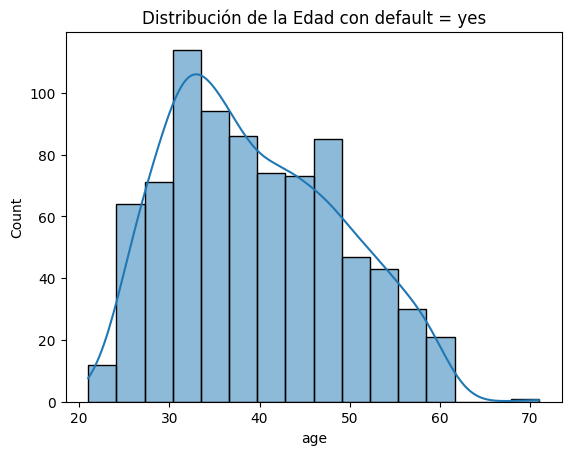

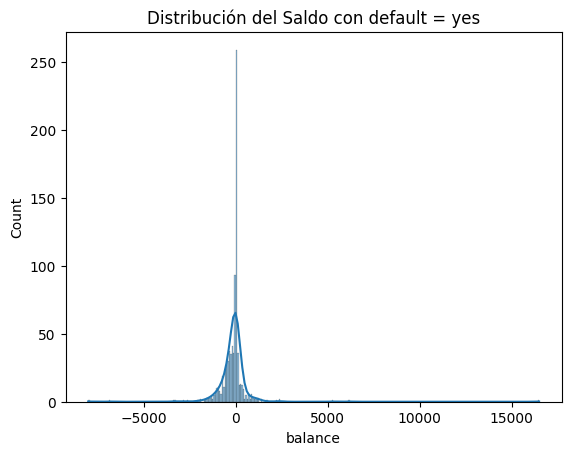

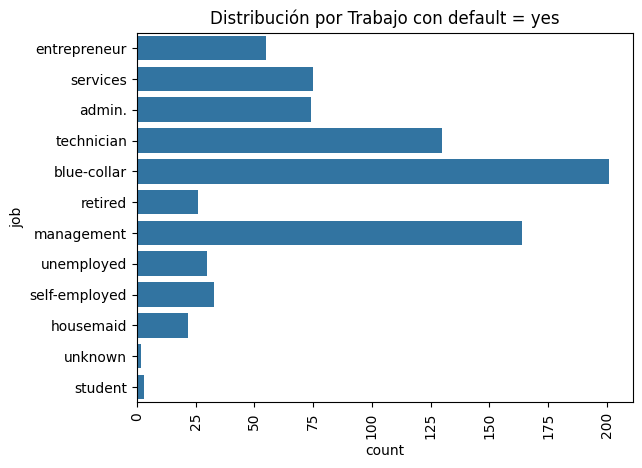

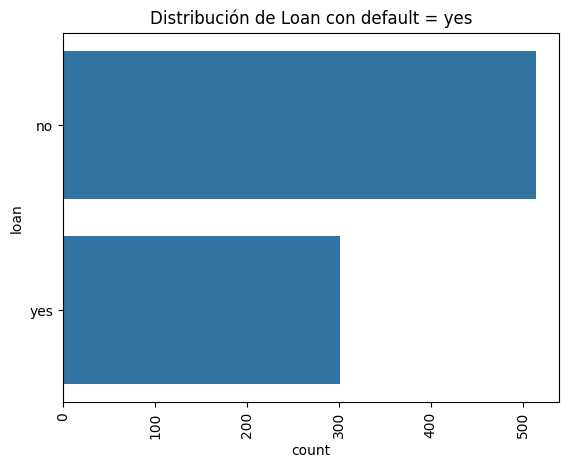

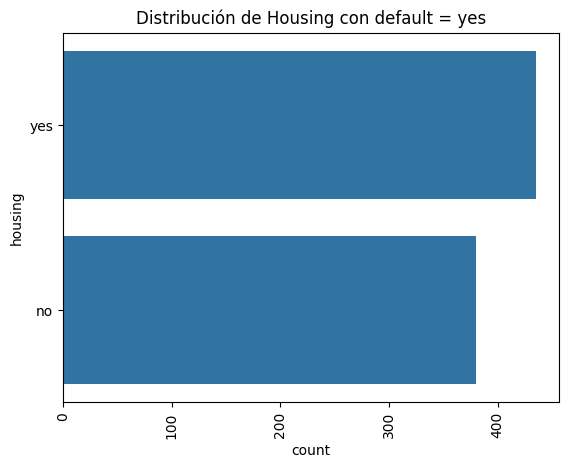

In [46]:
# Resumen estadístico de las variables filtradas con default = yes
print(df_default.describe())

# Ver la distribución de la edad
sns.histplot(df_default['age'], kde=True)
plt.title('Distribución de la Edad con default = yes')
plt.show()

# Ver la distribución del saldo
sns.histplot(df_default['balance'], kde=True)
plt.title('Distribución del Saldo con default = yes')
plt.show()

# Ver la distribución por trabajo
sns.countplot(y=df_default['job'])
plt.title('Distribución por Trabajo con default = yes')
plt.xticks(rotation=90)
plt.show()


# Ver la distribución por Loan
sns.countplot(y=df_default['loan'])
plt.title('Distribución de Loan con default = yes')
plt.xticks(rotation=90)
plt.show()


# Ver la distribución por Housing
sns.countplot(y=df_default['housing'])
plt.title('Distribución de Housing con default = yes')
plt.xticks(rotation=90)
plt.show()

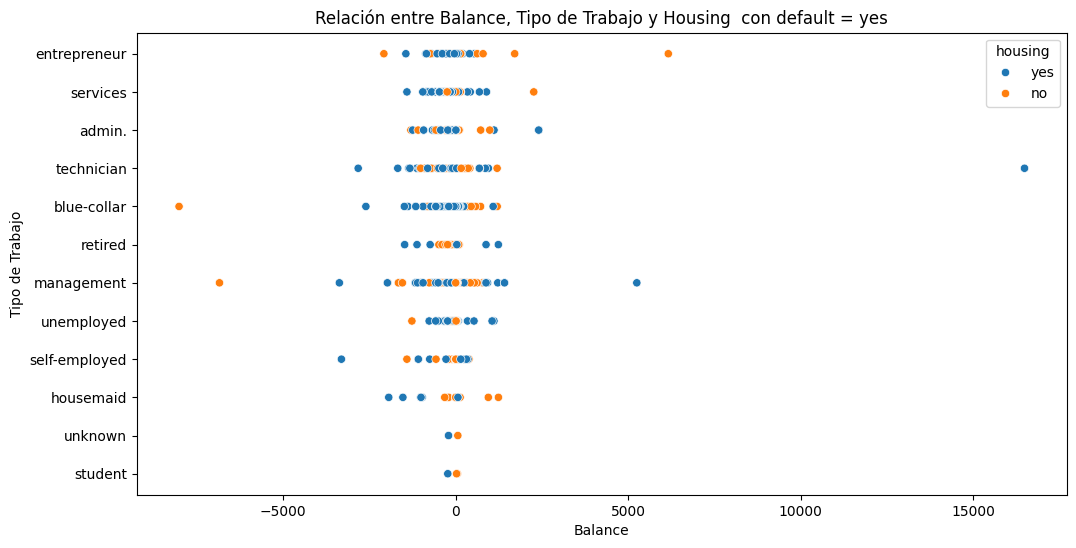

In [47]:
# Graficar el balance en relacion al tipo de trabajo y la variable 'housing' con default = yes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='job', hue='housing', data=df_default)
plt.title('Relación entre Balance, Tipo de Trabajo y Housing  con default = yes')
plt.xlabel('Balance')
plt.ylabel('Tipo de Trabajo')
plt.show()

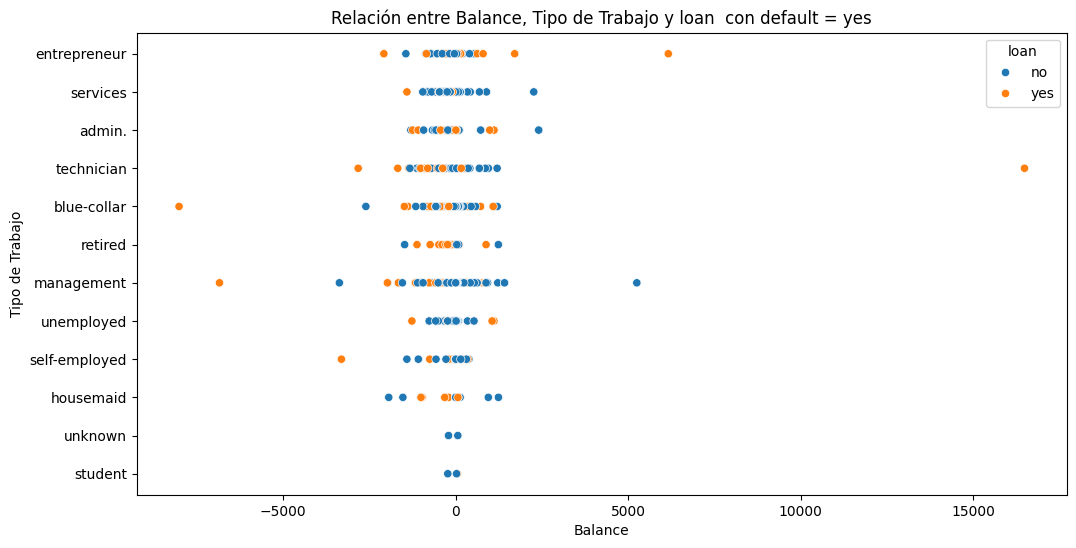

In [48]:
# Graficar el balance en relacion al tipo de trabajo y la variable 'loan' con default = yes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='job', hue='loan', data=df_default)
plt.title('Relación entre Balance, Tipo de Trabajo y loan  con default = yes')
plt.xlabel('Balance')
plt.ylabel('Tipo de Trabajo')
plt.show()

**Datos con job = unemployed**

In [49]:
#Se analizan las mismas variables en los casos en que el usuario tiene job = unemployed

df_unemployed = data[data['job']== 'unemployed']
df_unemployed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame
134,28,unemployed,single,tertiary,no,0,yes,no,unknown,5,may,125,2,-1,0,unknown,no,0.0
142,57,unemployed,married,tertiary,no,42,no,no,unknown,5,may,46,1,-1,0,unknown,no,0.0
147,48,unemployed,married,secondary,no,293,yes,no,unknown,5,may,243,1,-1,0,unknown,no,0.0
176,48,unemployed,married,secondary,no,41,yes,no,unknown,5,may,179,2,-1,0,unknown,no,0.0
217,53,unemployed,married,unknown,no,13,no,no,unknown,5,may,410,3,-1,0,unknown,no,0.0


In [50]:
#Se hace un profiling report del dataset que contiene observaciones con job = unemployed
profile4=ProfileReport(df_unemployed, title="Profiling Report Unemployed") #se genera
profile4.to_file('Profiling_Unemployed.html') #se exporta para no cargar el colab

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
df_unemployed.shape

(1303, 18)

               age       balance          day     duration     campaign  \
count  1303.000000   1303.000000  1303.000000  1303.000000  1303.000000   
mean     40.961627   1521.745971    15.498081   288.543361     2.432080   
std       9.777010   3144.666754     9.415146   290.049195     2.633201   
min      21.000000  -1270.000000     1.000000     2.000000     1.000000   
25%      33.000000     94.000000     6.000000   109.000000     1.000000   
50%      40.000000    529.000000    15.000000   200.000000     2.000000   
75%      48.000000   1603.500000    23.000000   360.500000     3.000000   
max      66.000000  44134.000000    31.000000  3025.000000    35.000000   

             pdays     previous     No_llame  
count  1303.000000  1303.000000  1303.000000  
mean     34.146585     0.466616     0.080583  
std      94.431841     1.537123     0.272299  
min      -1.000000     0.000000     0.000000  
25%      -1.000000     0.000000     0.000000  
50%      -1.000000     0.000000     0.0000

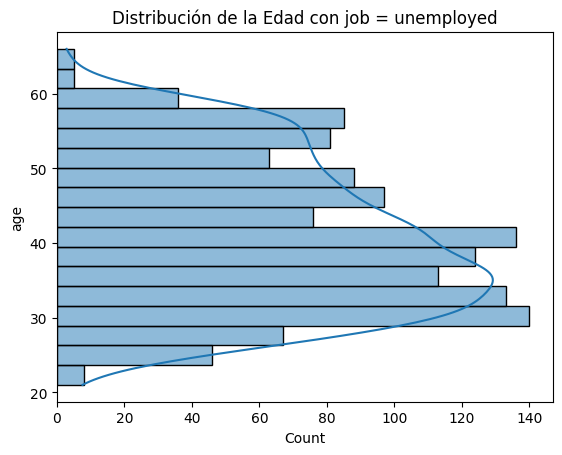

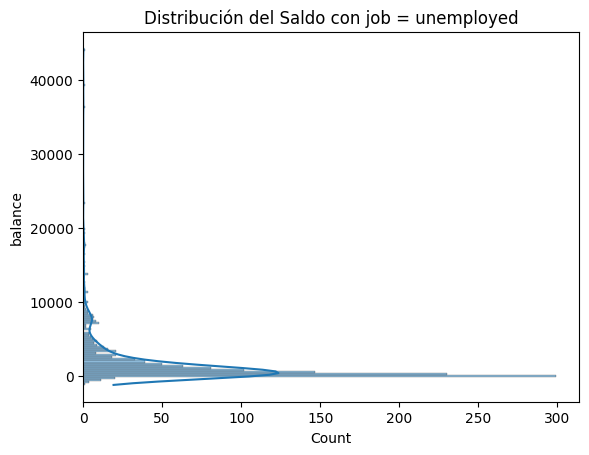

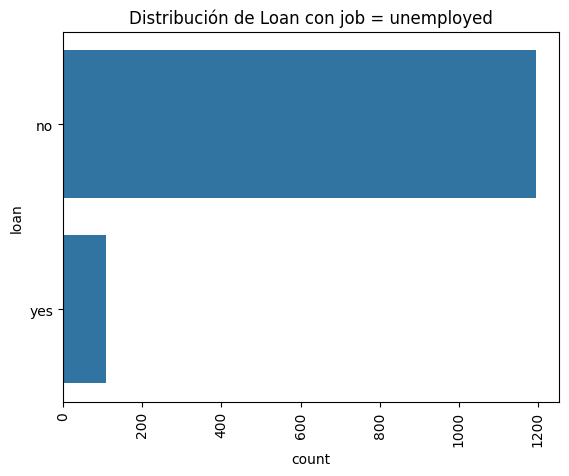

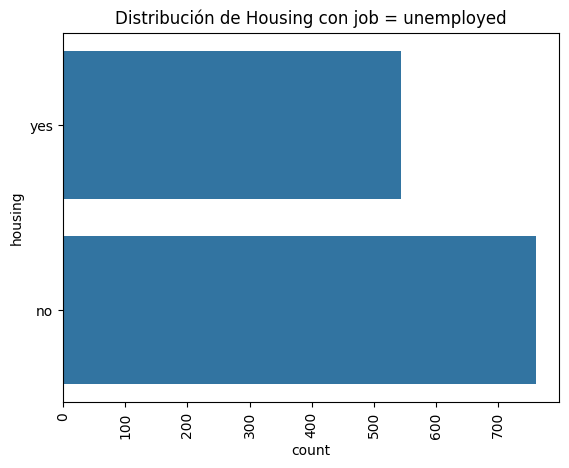

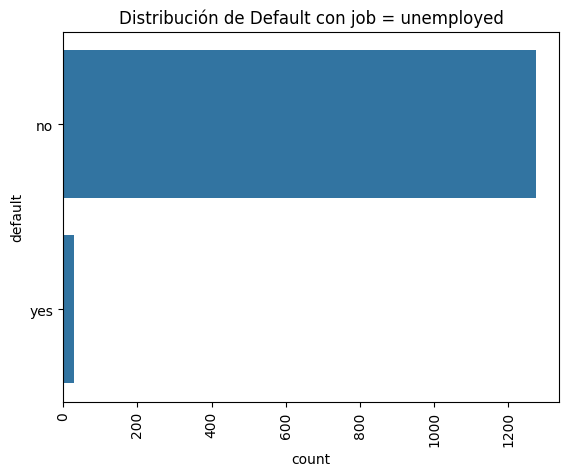

In [52]:
# Resumen estadístico de las variables filtradas por job = unemployed
print(df_unemployed.describe())

# Ver la distribución de la edad
sns.histplot(y=df_unemployed['age'], kde=True)
plt.title('Distribución de la Edad con job = unemployed')
plt.show()

# Ver la distribución del saldo
sns.histplot(y=df_unemployed['balance'], kde=True)
plt.title('Distribución del Saldo con job = unemployed')
plt.show()



# Ver la distribución por Loan
sns.countplot(y=df_unemployed['loan'])
plt.title('Distribución de Loan con job = unemployed')
plt.xticks(rotation=90)
plt.show()


# Ver la distribución por Housing
sns.countplot(y=df_unemployed['housing'])
plt.title('Distribución de Housing con job = unemployed')
plt.xticks(rotation=90)
plt.show()

# Ver la distribución por Default
sns.countplot(y=df_unemployed['default'])
plt.title('Distribución de Default con job = unemployed')
plt.xticks(rotation=90)
plt.show()


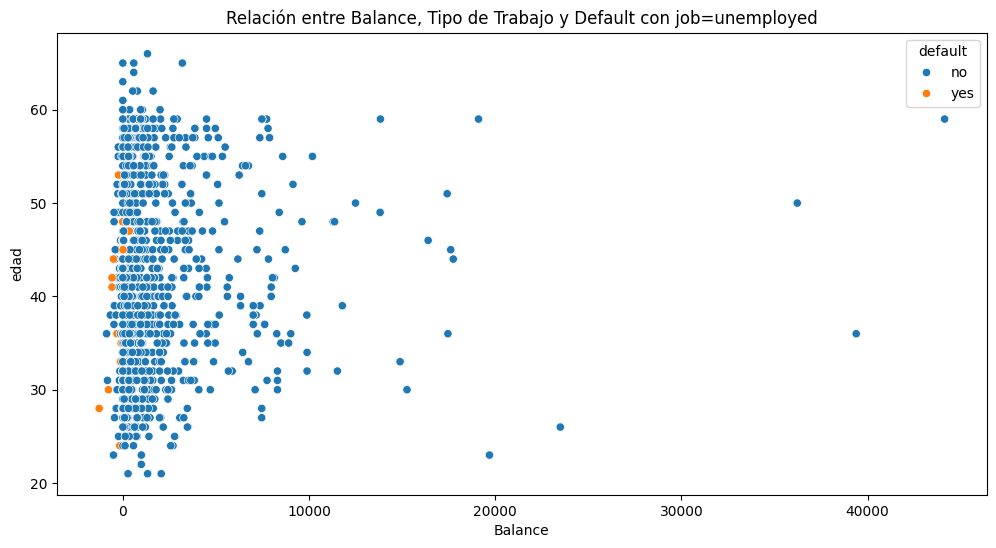

In [53]:
# Graficar el balance promedio en relacion a la edad y la variable 'default con job=unemployed'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='age', hue='default', data=df_unemployed)
plt.title('Relación entre Balance, Tipo de Trabajo y Default con job=unemployed')
plt.xlabel('Balance')
plt.ylabel('edad')
plt.show()

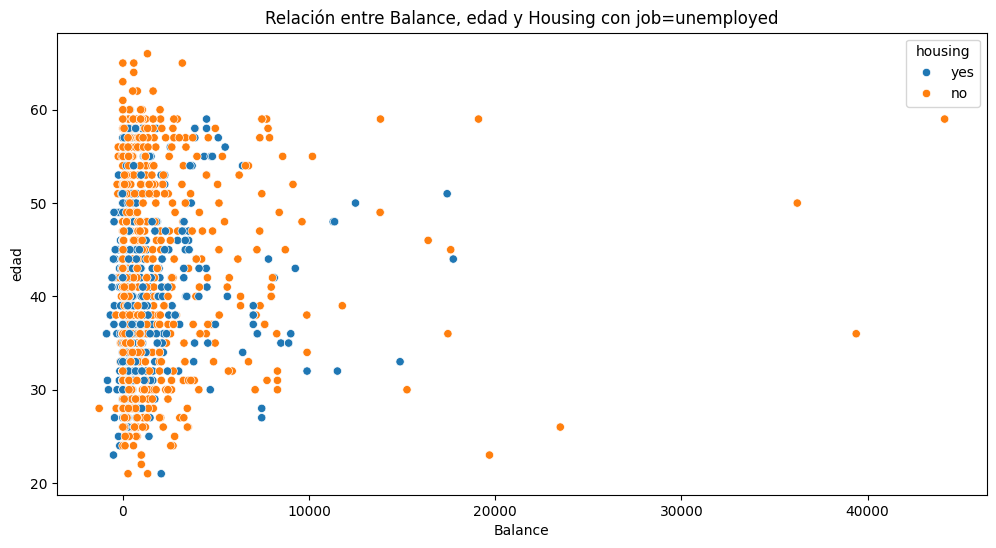

In [54]:
# Graficar el balance en relacion a la edad y la variable 'housing con job=unemployed'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='age', hue='housing', data=df_unemployed)
plt.title('Relación entre Balance, edad y Housing con job=unemployed')
plt.xlabel('Balance')
plt.ylabel('edad')
plt.show()

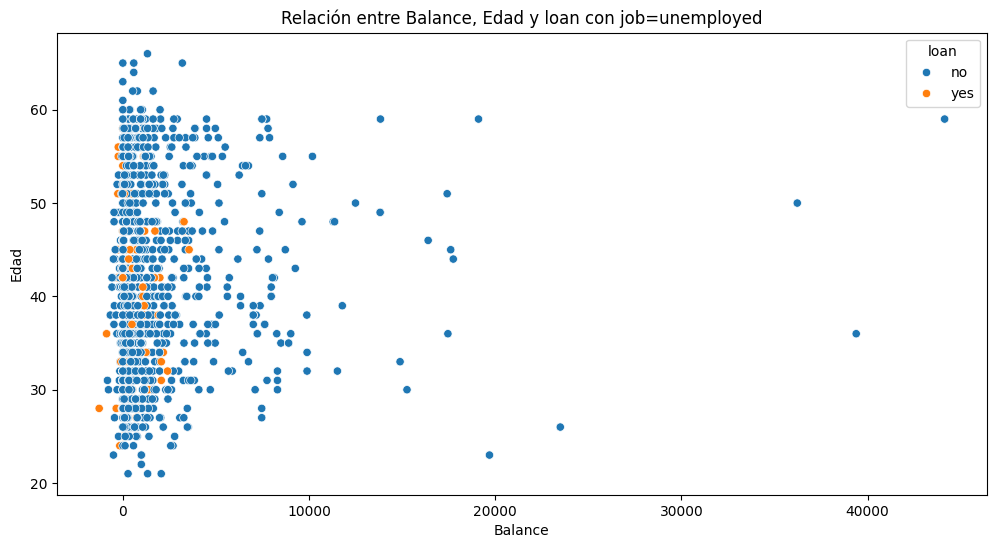

In [55]:
# Graficar el balance en relacion a la edady la variable 'loan' con job=unemployed
plt.figure(figsize=(12, 6))
sns.scatterplot(x='balance', y='age', hue='loan', data=df_unemployed)
plt.title('Relación entre Balance, Edad y loan con job=unemployed')
plt.xlabel('Balance')
plt.ylabel('Edad')
plt.show()

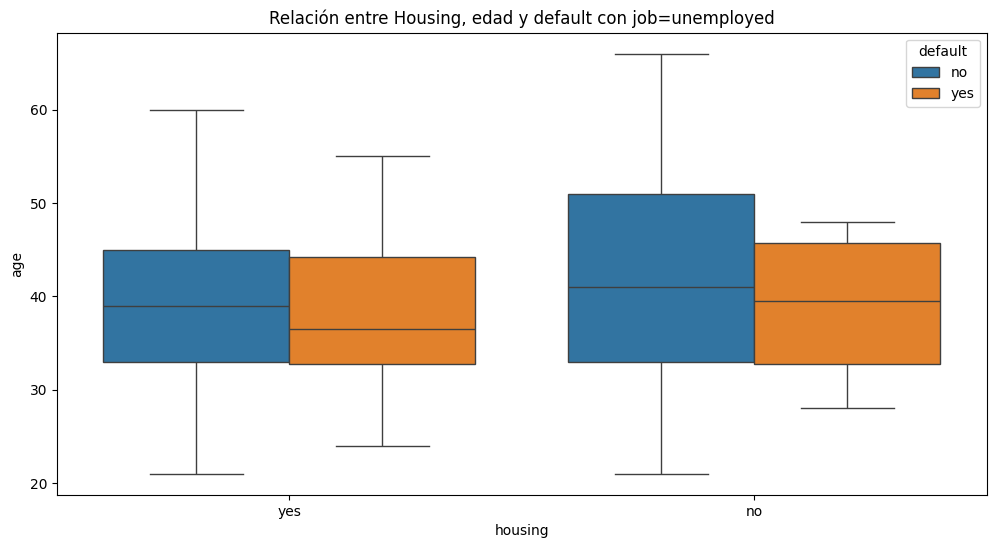

In [56]:
#Se verifca la distribucion de los datos segun edad, personas que tengan creditos hipotecarios, clasificados por default con job=unemployed
plt.figure(figsize=(12, 6))
sns.boxplot(x='housing', y='age', hue='default', data=df_unemployed)
plt.title('Relación entre Housing, edad y default con job=unemployed')
plt.xlabel('housing')
plt.ylabel('age')
plt.show()

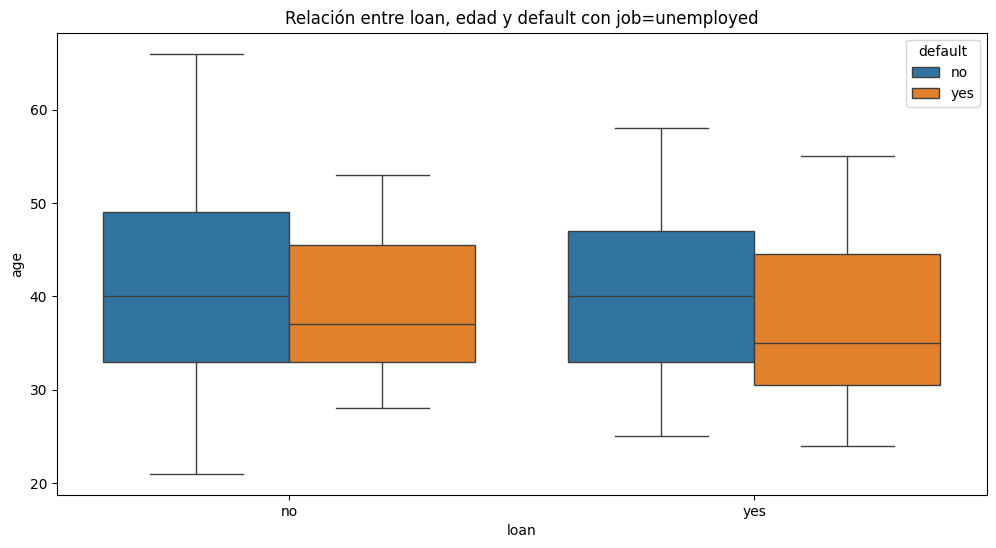

In [57]:
#Se verifca la distribucion de los datos segun edad, personas que tengan creditos personales, clasificados por default con job=unemployed
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan', y='age', hue='default', data=df_unemployed)
plt.title('Relación entre loan, edad y default con job=unemployed')
plt.xlabel('loan')
plt.ylabel('age')
plt.show()

In [58]:
#Filtrar el DataFrame para incluir solo las filas donde observaciones que tienen default = yes y balance menor a 0
df_balance_default = df_balance[df_balance['default'].isin(['yes'])]

#Filtrar el DataFrame para incluir solo las filas donde observaciones que tienen balance menor a 0 y job=unemployed
df_balance_unemployed = df_balance[df_balance['job'].isin(['unemployed'])]


#Filtrar el DataFrame para incluir solo las filas donde observaciones que tienen default = yes y job=unemployed
df_default_unemployed = df_default[df_default['job'].isin(['unemployed'])]


#Filtrar el DataFrame para incluir solo las filas donde observaciones que tienen default = yes, balance menor a 0 y job=unenmployed
df_balance_default_unemployed = df_balance[df_balance['default'].isin(['yes']) & df_balance['job'].isin(['unemployed'])]


# 1. Calcular el porcentaje de observaciones con balances menores a 0
p_balance_0 = (len(df_balance)/ len(data)) * 100
print("Porcentaje de observaciones que tienen balances menores a cero del total de las observaciones = ", p_balance_0, "%")

# 2. Calcular el porcentaje sobre el total de observaciones que tienen default = yes
p_default_yes = (len(df_default)/ len(data)) * 100
print("Porcentaje de observaciones que default = yes tiene sobre el total de las observaciones = ",p_default_yes, "%")

# 3. Calcular el porcentaje sobre el total de observaciones que tienen job=unemployed
p_unemployed = (len(df_unemployed)/ len(data)) * 100
print("Porcentaje de observaciones que job=unemployed tiene sobre el total de las observaciones = ",p_unemployed, "%")


# 4. Calcular el porcentaje sobre el total de observaciones que tienen default = yes y balance menor a 0
p_balance_default = (len(df_balance_default)/ len(data)) * 100
print("Porcentaje de observaciones que default = yes  y balance negativo tiene sobre el total de las observaciones  = ",p_balance_default, "%")

# 5. Calcular el porcentaje sobre el total de observaciones que tienen job=unemployed y balance menor a 0
p_balance_unemployed = (len(df_balance_unemployed)/ len(data)) * 100
print("Porcentaje de observaciones que tienen job=unemployed y balance menor a 0 sobre el total de las observaciones = ",p_balance_unemployed, "%")

# 6. Calcular el porcentaje sobre el total de observaciones que tienen job=unemployed y default =yes
p_default_unemployed = (len(df_default_unemployed)/ len(data)) * 100
print("Porcentaje de observaciones que tienen job=unemployed y default =yes sobre el total de las observaciones = ",p_default_unemployed, "%")


# 7. Calcular el porcentaje sobre el total de observaciones que tienen job=unemployed, default =yes y balance menor a 0
p_balance_default_unemployed = (len(df_balance_default_unemployed)/ len(data)) * 100
print("Porcentaje de observaciones que tienen job=unemployed, default =yes y balance menor a 0 sobre el total de las observaciones = ",p_balance_default_unemployed, "%")

Porcentaje de observaciones que tienen balances menores a cero del total de las observaciones =  8.329831235761208 %
Porcentaje de observaciones que default = yes tiene sobre el total de las observaciones =  1.8026586450200173 %
Porcentaje de observaciones que job=unemployed tiene sobre el total de las observaciones =  2.8820419809338436 %
Porcentaje de observaciones que default = yes  y balance negativo tiene sobre el total de las observaciones  =  0.9732144832009909 %
Porcentaje de observaciones que tienen job=unemployed y balance menor a 0 sobre el total de las observaciones =  0.1636769812656212 %
Porcentaje de observaciones que tienen job=unemployed y default =yes sobre el total de las observaciones =  0.0663555329455221 %
Porcentaje de observaciones que tienen job=unemployed, default =yes y balance menor a 0 sobre el total de las observaciones =  0.03538961757094512 %


 Aunque una minoría significativa de las observaciones tiene balances negativos, la incidencia de default y desempleo es relativamente baja. Los desempleados representan una pequeña fracción de la muestra, y aquellos que también están en default o tienen balances negativos son aún menos comunes. Las coincidencias de estas condiciones (desempleo, default y balances negativos) son raras, lo que sugiere que la mayoría de las observaciones no enfrentan múltiples problemas financieros graves simultáneamente.

## **Consistencia**

Existe alguna diferencia entre datos que representan un mismo aspecto de un tema?

Se verifica como se comportan los datos de los 3 tipos de trabajo con mas observaciones

1. El set de datos completo
2. Los datos en donde los usuarios tienen balance menor a 0
3. Los datos en donde los usuarios tienen al menos 1 credito en default

In [59]:
#Filtrar el dataframe para incluir solo el tipo de trabajo blue-colar

df_blue_collar = data[data['job'].isin(['blue-collar'])]

# Filtrar el DataFrame para incluir solo las filas donde el trabajo es "blue collar" y el balance es menor a 0
df_balance_blue_collar = df_balance[df_balance['job'].isin(['blue-collar'])]

#Filtrar el DataFrame para incluir solo las filas donde el trabajo es "blue collar" y el default es "yes"
df_blue_collar_d = data[data['job'].isin(['blue-collar']) & data['default'].isin(['yes'])]


# Calcular el total de observaciones que representa blue-collar en el total de observaciones
cant_blue_collar = len(df_blue_collar)


# Calcular el total de observaciones que representa blue-collar de los datos que tienen balance menor a 0
cant_balance_blue_collar = len(df_balance_blue_collar)


# Calcular el total de observaciones que representa blue-collar de los datos que tienen default yes
cant_blue_collar_d = len(df_blue_collar_d)


# Calcular el porcentaje sobre el total de observaciones que tienen blue collar
p_blue_collar = (cant_blue_collar/ len(data)) * 100
print("Porcentaje de observaciones que blue collar tiene sobre el total de las observaciones = ", p_blue_collar, "%")

# Calcular el porcentaje sobre el total de observaciones que tienen blue collar y balance menor a 0
p_blue_collar_balance = (cant_balance_blue_collar/ len(df_balance)) * 100
print("Porcentaje de observaciones que blue collar tiene sobre el total de las observaciones que tienen balance menor a 0 = ",p_blue_collar_balance, "%")


# Calcular el porcentaje sobre el total de observaciones que tienen blue collar y default yes
p_blue_collar_d = (cant_blue_collar_d/ len(df_balance)) * 100
print("Porcentaje de observaciones que blue collar tiene sobre el total de las observaciones que tienen default yes = ",p_blue_collar_d , "%")

Porcentaje de observaciones que blue collar tiene sobre el total de las observaciones =  21.525734887527374 %
Porcentaje de observaciones que blue collar tiene sobre el total de las observaciones que tienen balance menor a 0 =  29.474243228890067 %
Porcentaje de observaciones que blue collar tiene sobre el total de las observaciones que tienen default yes =  5.337227827934147 %


In [60]:
#Filtrar el dataframe para incluir solo el tipo de trabajo technician

df_technician = data[data['job'].isin(['technician'])]

# Filtrar el DataFrame para incluir solo las filas donde el trabajo es "technician" y el balance es menor a 0
df_balance_technician = df_balance[df_balance['job'].isin(['technician'])]


#Filtrar el DataFrame para incluir solo las filas donde el trabajo es "technician" y el default es "yes"
df_technician_d = data[data['job'].isin(['technician']) & data['default'].isin(['yes'])]

# Calcular el total de observaciones que representa technician en el total de observaciones
cant_technician = len(df_technician)



# Calcular el total de observaciones que representa technician de los datos que tienen balance menor a 0
cant_balance_technician = len(df_balance_technician)

# Calcular el total de observaciones que representa technician de los datos que tienen default yes
cant_technician_d = len(df_technician_d)

# Calcular el porcentaje sobre el total de observaciones que tienen technician
p_technician = (cant_technician/ len(data)) * 100
print("Porcentaje de observaciones que technician tiene sobre el total de las observaciones = ", p_technician, "%")

# Calcular el porcentaje sobre el total de observaciones que tienen technician y balance menor a 0
p_technician_balance = (cant_balance_technician/ len(df_balance)) * 100
print("Porcentaje de observaciones que technician tiene sobre el total de las observaciones que tienen balance menor a 0 = ",p_technician_balance, "%")


# Calcular el porcentaje sobre el total de observaciones que tienen technician y default yes
p_technician_d = (cant_technician_d/ len(df_balance)) * 100
print("Porcentaje de observaciones que technician tiene sobre el total de las observaciones que tienen default yes = ",p_technician_d , "%")

Porcentaje de observaciones que technician tiene sobre el total de las observaciones =  16.80343279290438 %
Porcentaje de observaciones que technician tiene sobre el total de las observaciones que tienen balance menor a 0 =  17.41901221455125 %
Porcentaje de observaciones que technician tiene sobre el total de las observaciones que tienen default yes =  3.451938396176314 %


In [61]:
#Filtrar el dataframe para incluir solo el tipo de trabajo management

df_management = data[data['job'].isin(['management'])]

# Filtrar el DataFrame para incluir solo las filas donde el trabajo es "management" y el balance es menor a 0
df_balance_management = df_balance[df_balance['job'].isin(['management'])]

#Filtrar el DataFrame para incluir solo las filas donde el trabajo es "management" y el default es "yes"
df_management_d = data[data['job'].isin(['management']) & data['default'].isin(['yes'])]

# Calcular el total de observaciones que representa technician en el total de observaciones
cant_management = len(df_management)


# Calcular el total de observaciones que representa management de los datos que tienen balance menor a 0
cant_balance_management = len(df_balance_management)

# Calcular el total de observaciones que representa management de los datos que tienen default yes
cant_management_d = len(df_management_d)

# Calcular el porcentaje sobre el total de observaciones que tienen management
p_management = (cant_management/ len(data)) * 100
print("Porcentaje de observaciones que management tiene sobre el total de las observaciones = ", p_management, "%")

# Calcular el porcentaje sobre el total de observaciones que tienen management y balance menor a 0
p_management_balance = (cant_balance_management/ len(df_balance)) * 100
print("Porcentaje de observaciones que management tiene sobre el total de las observaciones que tienen balance menor a 0 = ",p_management_balance, "%")


# Calcular el porcentaje sobre el total de observaciones que tienen management y default yes
p_management_d = (cant_management_d/ len(df_balance)) * 100
print("Porcentaje de observaciones que management tiene sobre el total de las observaciones que tienen default yes = ",p_management_d , "%")

Porcentaje de observaciones que management tiene sobre el total de las observaciones =  20.919687686624936 %
Porcentaje de observaciones que management tiene sobre el total de las observaciones que tienen balance menor a 0 =  15.002655337227827 %
Porcentaje de observaciones que management tiene sobre el total de las observaciones que tienen default yes =  4.354753053637812 %


Los trabajadores blue collar no solo son el grupo más grande, sino también el más propenso a tener balances negativos y a estar en mora. Los técnicos y gerentes, aunque representan una parte significativa de las observaciones totales, parecen estar en una mejor posición financiera en términos de balances y morosidad.

## **Precisión**

Porcentaje de datos que tienen diferencias con respecto a un patrón

Se comparan los resultados con respecto a una media.

Se calcula que porcentaje de los valores de Edad estan por encima y por debajo de un 10% respecto de la media para:
1. Todo el set de datos
2. Para el set de datos que tiene balance negativo
3. Para el set de datos que tiene al menos 1 credito impago
4. Para el set de datos que tiene usuarios desempleados

In [62]:
#Se calcula que porcentaje de los valores de Edad estan por encima y por debajo de un 10% respecto de la media para todo el set de datos
avg_edad = data['age'].mean()

# Calcular el 10% del promedio
diez_por_ciento = 0.10 * avg_edad

# Definir los umbrales
limite_superior = avg_edad + diez_por_ciento
limite_inferior = avg_edad - diez_por_ciento

# Contar los datos por encima y por debajo del 10% del promedio
por_encima = data[data['age'] > limite_superior].shape[0]
por_debajo = data[data['age'] < limite_inferior].shape[0]
total = data.shape[0]

# Calcular los porcentajes
porcentaje_encima = (por_encima / total) * 100
porcentaje_debajo = (por_debajo / total) * 100

# Mostrar los resultados
print("El porcentaje de datos por encima del 10% del promedio es:", porcentaje_encima, "%")
print("El porcentaje de datos por debajo del 10% del promedio es:", porcentaje_debajo, "%")

El porcentaje de datos por encima del 10% del promedio es: 31.95682466656345 %
El porcentaje de datos por debajo del 10% del promedio es: 41.39036960031851 %


In [63]:
#Se calcula que porcentaje de los valores de Edad estan por encima y por debajo de un 10% respecto de la media para el set de datos con balance menor a 0
avg_edad_2 = df_balance['age'].mean()

# Calcular el 10% del promedio
diez_por_ciento_2 = 0.10 * avg_edad_2

# Definir los umbrales
limite_superior_2 = avg_edad_2 + diez_por_ciento_2
limite_inferior_2 = avg_edad_2 - diez_por_ciento_2

# Contar los datos por encima y por debajo del 10% del promedio
por_encima_2= df_balance[df_balance['age'] > limite_superior_2].shape[0]
por_debajo_2= df_balance[df_balance['age'] < limite_inferior_2].shape[0]
total_2= df_balance.shape[0]

# Calcular los porcentajes
porcentaje_encima_2= (por_encima_2/ total_2) * 100
porcentaje_debajo_2= (por_debajo_2/ total_2) * 100

# Mostrar los resultados
print("El porcentaje de datos con balance negativo por encima del 10% del promedio es:", porcentaje_encima_2, "%")
print("El porcentaje de datos con balance negativo por debajo del 10% del promedio es:", porcentaje_debajo_2, "%")

El porcentaje de datos con balance negativo por encima del 10% del promedio es: 32.79341476367499 %
El porcentaje de datos con balance negativo por debajo del 10% del promedio es: 39.88316516197557 %


In [64]:
#Se calcula que porcentaje de los valores de Edad estan por encima y por debajo de un 10% respecto de la media para el set de datos con default=yes
avg_edad_3 = df_default['age'].mean()

# Calcular el 10% del promedio
diez_por_ciento_3 = 0.10 * avg_edad_3

# Definir los umbrales
limite_superior_3 = avg_edad_3 + diez_por_ciento_3
limite_inferior_3 = avg_edad_3 - diez_por_ciento_3

# Contar los datos por encima y por debajo del 10% del promedio
por_encima_3= df_default[df_default['age'] > limite_superior_3].shape[0]
por_debajo_3= df_default[df_default['age'] < limite_inferior_3].shape[0]
total_3= df_default.shape[0]

# Calcular los porcentajes
porcentaje_encima_3= (por_encima_3/ total_3) * 100
porcentaje_debajo_3= (por_debajo_3/ total_3) * 100

# Mostrar los resultados
print("El porcentaje de datos con default=yes por encima del 10% del promedio es:", porcentaje_encima_3, "%")
print("El porcentaje de datos con default=yes por debajo del 10% del promedio es:", porcentaje_debajo_3, "%")

El porcentaje de datos con default=yes por encima del 10% del promedio es: 33.49693251533743 %
El porcentaje de datos con default=yes por debajo del 10% del promedio es: 40.3680981595092 %


In [65]:
#Se calcula que porcentaje de los valores de Edad estan por encima y por debajo de un 10% respecto de la media para el set de datos con job =unemployed
avg_edad_4 = df_unemployed['age'].mean()

# Calcular el 10% del promedio
diez_por_ciento_4 = 0.10 * avg_edad_4

# Definir los umbrales
limite_superior_4 = avg_edad_4 + diez_por_ciento_4
limite_inferior_4 = avg_edad_4 - diez_por_ciento_4

# Contar los datos por encima y por debajo del 10% del promedio
por_encima_4= df_unemployed[df_unemployed['age'] > limite_superior_4].shape[0]
por_debajo_4= df_unemployed[df_unemployed['age'] < limite_inferior_4].shape[0]
total_4= df_unemployed.shape[0]

# Calcular los porcentajes
porcentaje_encima_4= (por_encima_4/ total_4) * 100
porcentaje_debajo_4= (por_debajo_4/ total_4) * 100

# Mostrar los resultados
print("El porcentaje de datos con unemployed=yes por encima del 10% del promedio es:", porcentaje_encima_4, "%")
print("El porcentaje de datos con unemployed=yes por debajo del 10% del promedio es:", porcentaje_debajo_4, "%")

El porcentaje de datos con unemployed=yes por encima del 10% del promedio es: 32.77052954719878 %
El porcentaje de datos con unemployed=yes por debajo del 10% del promedio es: 38.91020721412126 %


Los datos tienden a estar más frecuentemente por debajo del 10% del promedio en todas las categorías evaluadas, lo que puede indicar una distribución asimétrica con una mayor densidad de datos en la parte inferior del espectro. Esto sugiere que las observaciones con balances negativos, default o desempleo no se desvían significativamente por encima del promedio, manteniéndose más comúnmente en niveles inferiores en relación al promedio general.

# **5) Creacion del perfil de riesgo**

In [66]:
#Se crea una variable que perfile el riesgo de credito en funcion a las variables edad, balance y tipo de trabajo

# Inicializar una lista vacía para almacenar los valores de riesgo crediticio
credit_risk = []

# Iterar sobre cada fila del dataframe
for i in range(len(data)):
    age = data.loc[i, 'age']
    balance = data.loc[i, 'balance']
    job = data.loc[i, 'job']
    default = data.loc[i, 'default']


# Aplicar las condiciones
    if 35 <= age <= 45 and balance < 0  and job in ['unemployed']  and default in ['yes']:
        credit_risk.append(3)
    elif 35 <= age <= 45 and balance < 0 and default in ['yes']:
         credit_risk.append(2)
    elif 35 <= age <= 45 and balance < 0 :
        credit_risk.append(1)

    else:
        credit_risk.append(0)

# Añadir la nueva columna al dataframe
data['credit_risk'] = credit_risk

# Mostrar el dataframe resultante
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.0,0


In [67]:
#Verificamos
# Mostrar solo las filas que deberían tener credit_risk igual a 3
data_risk_3 = data[(data['credit_risk'] ==3)]
data_risk_3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
1364,41,unemployed,married,primary,yes,-581,yes,no,unknown,8,may,218,2,-1,0,unknown,no,0.0,3
3438,36,unemployed,married,secondary,yes,-318,yes,no,unknown,15,may,133,2,-1,0,unknown,no,1.0,3
8702,44,unemployed,married,secondary,yes,-505,yes,no,unknown,3,jun,113,11,-1,0,unknown,no,0.0,3
12476,45,unemployed,divorced,primary,yes,-249,yes,yes,unknown,1,jul,92,1,-1,0,unknown,no,0.0,3
18001,44,unemployed,single,primary,yes,-4,no,yes,cellular,30,jul,788,2,-1,0,unknown,yes,0.0,3
25550,35,unemployed,single,secondary,yes,-126,no,no,cellular,19,nov,168,1,-1,0,unknown,no,0.0,3
30840,35,unemployed,single,primary,yes,-84,no,no,cellular,9,feb,19,11,-1,0,unknown,no,0.0,3
30979,44,unemployed,married,primary,yes,-43,yes,no,cellular,9,feb,290,6,-1,0,unknown,no,0.0,3
37050,42,unemployed,married,primary,yes,-581,yes,no,cellular,13,may,224,1,370,2,failure,no,0.0,3


In [68]:
# Contar el número de filas con credit_risk igual a 3
count_risk_3 = data[data['credit_risk'] == 3].shape[0]
print(f'Número de filas con credit_risk igual a 3: {count_risk_3}')

Número de filas con credit_risk igual a 3: 9


In [69]:
#Verificamos
# Mostrar solo las filas que deberían tener credit_risk igual a 2
data_risk_2 = data[(data['credit_risk'] ==2)]
data_risk_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
572,41,blue-collar,single,primary,yes,-137,yes,yes,unknown,6,may,189,1,-1,0,unknown,no,0.0,2
838,35,blue-collar,single,unknown,yes,-532,yes,no,unknown,7,may,149,1,-1,0,unknown,no,0.0,2
932,40,blue-collar,married,secondary,yes,-94,yes,yes,unknown,7,may,227,1,-1,0,unknown,no,0.0,2
933,39,blue-collar,married,secondary,yes,-345,yes,no,unknown,7,may,69,1,-1,0,unknown,no,0.0,2
1199,43,blue-collar,married,secondary,yes,-7,no,no,unknown,8,may,70,1,-1,0,unknown,no,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37290,45,management,divorced,tertiary,yes,-946,yes,no,cellular,13,may,213,1,-1,0,unknown,no,0.0,2
38244,39,blue-collar,divorced,secondary,yes,-202,yes,yes,cellular,15,may,157,4,-1,0,unknown,no,0.0,2
38434,39,entrepreneur,married,tertiary,yes,-172,yes,no,cellular,15,may,562,2,-1,0,unknown,yes,0.0,2
38726,35,management,married,tertiary,yes,-10,yes,no,cellular,15,may,168,2,364,1,other,no,0.0,2


In [70]:
# Contar el número de filas con credit_risk igual a 2
count_risk_2 = data[data['credit_risk'] == 2].shape[0]
print(f'Número de filas con credit_risk igual a 2: {count_risk_2}')

Número de filas con credit_risk igual a 2: 138


In [71]:
#Verificamos
# Mostrar solo las filas que deberían tener credit_risk igual a 1
data_risk_1 = data[(data['credit_risk'] ==1)]
data_risk_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no,0.0,1
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no,0.0,1
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no,0.0,1
100,44,blue-collar,married,secondary,no,-674,yes,no,unknown,5,may,257,1,-1,0,unknown,no,0.0,1
152,40,management,married,tertiary,no,-4,yes,no,unknown,5,may,2033,1,-1,0,unknown,no,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42961,35,admin.,single,secondary,no,-32,no,yes,cellular,9,feb,63,4,182,5,failure,yes,0.0,1
43488,36,management,married,tertiary,no,-115,yes,no,cellular,16,apr,297,4,182,2,other,yes,0.0,1
44240,35,blue-collar,married,secondary,no,-17,yes,no,unknown,20,jul,7,1,-1,0,unknown,no,0.0,1
44469,35,admin.,single,secondary,no,-32,no,yes,cellular,6,aug,366,2,178,9,success,yes,1.0,1


In [72]:
# Contar el número de filas con credit_risk igual a 1
count_risk_1 = data[data['credit_risk'] == 1].shape[0]
print(f'Número de filas con credit_risk igual a 1: {count_risk_1}')

Número de filas con credit_risk igual a 1: 1293


# **6) Verificar el estado de los prestamos asignados a los clientes identificados en la situacion anterior**

In [73]:
#Validar los datos de los usuarios con housing = yes y loan = yes que tienen credit_risk = 3

df_risk_3 = data[(data['housing'] == 'yes') & (data['loan'] == 'yes')& (data['credit_risk'] == 3)]
df_risk_3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
12476,45,unemployed,divorced,primary,yes,-249,yes,yes,unknown,1,jul,92,1,-1,0,unknown,no,0.0,3


In [74]:
#Contamos los casos
count_risk_3=df_risk_3.shape[0]
count_risk_3

1

In [75]:
#Casos positivos risk_3

p_positivos_3= (count_risk_3/ len(data)) * 100
print("Porcentaje de casos positivos de credit risk 3 del total de la data = ",p_positivos_3 , "%")


Porcentaje de casos positivos de credit risk 3 del total de la data =  0.00221185109818407 %


In [76]:
#Validar los datos de los usuarios con housing = yes y loan = yes que tienen credit_risk = 2

df_risk_2 = data[(data['housing'] == 'yes') & (data['loan'] == 'yes')& (data['credit_risk'] == 2)]
df_risk_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
572,41,blue-collar,single,primary,yes,-137,yes,yes,unknown,6,may,189,1,-1,0,unknown,no,0.0,2
932,40,blue-collar,married,secondary,yes,-94,yes,yes,unknown,7,may,227,1,-1,0,unknown,no,0.0,2
3725,44,housemaid,married,primary,yes,-972,yes,yes,unknown,16,may,114,2,-1,0,unknown,no,0.0,2
4095,44,admin.,married,secondary,yes,-1249,yes,yes,unknown,19,may,83,4,-1,0,unknown,no,0.0,2
4581,38,services,married,secondary,yes,-242,yes,yes,unknown,20,may,236,2,-1,0,unknown,no,0.0,2
5036,35,technician,married,secondary,yes,-29,yes,yes,unknown,21,may,208,3,-1,0,unknown,no,0.0,2
5145,36,admin.,divorced,secondary,yes,-491,yes,yes,unknown,21,may,671,3,-1,0,unknown,no,1.0,2
5353,36,management,divorced,tertiary,yes,-1,yes,yes,unknown,23,may,268,1,-1,0,unknown,no,0.0,2
5761,41,blue-collar,married,secondary,yes,-651,yes,yes,unknown,26,may,374,1,-1,0,unknown,no,0.0,2
7032,36,blue-collar,married,secondary,yes,-347,yes,yes,unknown,28,may,109,3,-1,0,unknown,no,0.0,2


In [77]:
#Contamos los casos
count_risk_2=df_risk_2.shape[0]
count_risk_2

35

In [78]:
#Casos positivos risk_2

p_positivos_2= (count_risk_2/ len(data)) * 100
print("Porcentaje de casos positivos de credit risk 2 del total de la data = ",p_positivos_2 , "%")

Porcentaje de casos positivos de credit risk 2 del total de la data =  0.07741478843644245 %


In [79]:
#Validar los datos de los usuarios con housing = yes y loan = yes que tienen credit_risk = 1

df_risk_1 = data[(data['housing'] == 'yes') & (data['loan'] == 'yes')& (data['credit_risk'] == 1)]
df_risk_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
281,41,admin.,married,secondary,no,-62,yes,yes,unknown,5,may,55,2,-1,0,unknown,no,0.0,1
456,40,admin.,single,secondary,no,-109,yes,yes,unknown,6,may,170,1,-1,0,unknown,no,0.0,1
589,37,blue-collar,married,primary,no,-325,yes,yes,unknown,6,may,112,2,-1,0,unknown,no,0.0,1
649,41,technician,married,secondary,no,-366,yes,yes,unknown,6,may,29,3,-1,0,unknown,no,0.0,1
657,40,blue-collar,married,primary,no,-322,yes,yes,unknown,6,may,144,1,-1,0,unknown,no,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39107,45,technician,divorced,secondary,no,-357,yes,yes,cellular,18,may,618,1,355,2,failure,yes,0.0,1
39139,36,blue-collar,married,secondary,no,-73,yes,yes,cellular,18,may,15,8,-1,0,unknown,no,0.0,1
39185,35,blue-collar,single,secondary,no,-295,yes,yes,cellular,18,may,173,2,-1,0,unknown,no,0.0,1
39309,35,technician,married,secondary,no,-706,yes,yes,cellular,18,may,44,2,-1,0,unknown,no,0.0,1


In [80]:
#Contamos los casos
count_risk_1=df_risk_1.shape[0]
count_risk_1

267

In [81]:
#Casos positivos risk_1

p_positivos_1= (count_risk_1/ len(data)) * 100
print("Porcentaje de casos positivos de credit risk 1 del total de la data = ",p_positivos_1 , "%")

Porcentaje de casos positivos de credit risk 1 del total de la data =  0.5905642432151468 %


# **7)Verificar cuáles clientes contactados pueden haberlo sido en incumplimiento a la ley 26.951.**


In [82]:
# Agrupar los datos por la columna 'no_llame'
# Filtrar los datos por columna "no_llame"
filtered_df_no_llame = data[(data['No_llame'] == 1)]
filtered_df_no_llame

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no,1.0,0
22,32,blue-collar,single,primary,no,23,yes,yes,unknown,5,may,160,1,-1,0,unknown,no,1.0,0
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no,1.0,0
103,59,blue-collar,married,primary,no,179,yes,no,unknown,5,may,55,3,-1,0,unknown,no,1.0,0
112,56,self-employed,married,primary,no,-34,yes,yes,unknown,5,may,212,2,-1,0,unknown,no,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,-1,0,unknown,no,1.0,0
45155,44,entrepreneur,married,tertiary,no,121,no,no,cellular,9,nov,248,1,91,1,success,yes,1.0,0
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no,1.0,0
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no,1.0,0


In [83]:
count_2 = filtered_df_no_llame.shape[0]
count_2

3439

In [84]:
# Agrupar los datos por usuarios que estaban en la lista de no llame, no fueron contactados en el pasado ni tampoco en esta campaña

filtered_df2= data[(data['No_llame'] == 1) & (data['pdays'] == -1) & (data['previous'] ==0)]
filtered_df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no,1.0,0
22,32,blue-collar,single,primary,no,23,yes,yes,unknown,5,may,160,1,-1,0,unknown,no,1.0,0
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no,1.0,0
103,59,blue-collar,married,primary,no,179,yes,no,unknown,5,may,55,3,-1,0,unknown,no,1.0,0
112,56,self-employed,married,primary,no,-34,yes,yes,unknown,5,may,212,2,-1,0,unknown,no,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44930,34,admin.,single,secondary,no,239,no,no,unknown,5,oct,6,1,-1,0,unknown,no,1.0,0
45042,64,retired,married,secondary,no,466,yes,no,cellular,18,oct,526,1,-1,0,unknown,yes,1.0,0
45048,32,student,single,tertiary,no,922,no,no,cellular,18,oct,338,2,-1,0,unknown,no,1.0,0
45070,49,technician,married,secondary,no,2400,no,no,cellular,21,oct,262,3,-1,0,unknown,no,1.0,0


In [85]:
count_3 = filtered_df2.shape[0]
count_3

2832

In [86]:
#Casos positivos no llame, cantidad de veces contactadas en el pasado = 0 y número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior pero -1 significa que el cliente no fue previamente contactado
p_positivos_no_llame = (count_3/ len(data)) * 100
print("Porcentaje de casos positivos de personas que no fueron contactadas en el pasado y pertenecen al grupo no llame sobre el total de datos ",p_positivos_no_llame , "%")



Porcentaje de casos positivos de personas que no fueron contactadas en el pasado y pertenecen al grupo no llame sobre el total de datos  6.263962310057288 %


In [87]:
#Casos que podrian estar en incumplimiento

filtered_df_incumplimiento = data[(data['No_llame'] == 1) & (data['pdays'] != -1) & (data['previous']!=0)]
filtered_df_incumplimiento


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk
24203,49,management,married,tertiary,no,1533,no,no,cellular,17,nov,324,1,172,1,failure,no,1.0,0
24364,58,retired,married,secondary,no,8332,no,no,unknown,17,nov,164,2,96,4,failure,no,1.0,0
24473,36,blue-collar,married,secondary,no,1797,yes,yes,cellular,17,nov,166,1,181,2,failure,no,1.0,0
24486,42,entrepreneur,married,tertiary,no,373,no,no,cellular,17,nov,174,1,154,3,failure,no,1.0,0
24623,41,blue-collar,married,secondary,no,271,yes,no,cellular,17,nov,148,2,172,2,failure,no,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45111,64,retired,married,primary,no,445,no,no,cellular,26,oct,338,3,186,1,other,no,1.0,0
45155,44,entrepreneur,married,tertiary,no,121,no,no,cellular,9,nov,248,1,91,1,success,yes,1.0,0
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no,1.0,0
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no,1.0,0


In [88]:
count_4 = filtered_df_incumplimiento.shape[0]
count_4

607

In [89]:
#Casos de incumplimiento donde esta categorizado como no llame y fue contactado al menos 1 vez en una campaña anterior
p_incumplimiento = (count_4/ len(data)) * 100
print("Porcentaje de casos de incumplimiento donde esta categorizado como no llame y fue contactado al menos 1 vez en una campaña anterior ",p_incumplimiento, "%")

Porcentaje de casos de incumplimiento donde esta categorizado como no llame y fue contactado al menos 1 vez en una campaña anterior  1.3425936165977306 %


# **8) Perfil de riesgo de incumplimiento de la ley 26.951**



In [90]:
valores_unicos_pdays = sorted(data['pdays'].unique())
valores_unicos_pdays

[-1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 1

In [91]:
valores_unicos_previous = sorted(data['previous'].unique())
valores_unicos_previous

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 35,
 37,
 38,
 40,
 41,
 51,
 55,
 58,
 275]

In [92]:
#Se define una variable
#Se crea una variable que perfile el riesgo judicial por incumplimiento de la ley 26.951

# Inicializar una lista vacía para almacenar los valores de riesgo de incumplimiento
compliance_risk = []

# Iterar sobre cada fila del dataframe
for i in range(len(data)):
    pdays = data.loc[i, 'pdays']
    previous = data.loc[i,'previous']
    No_llame = data.loc[i, 'No_llame']




# Aplicar las condiciones
    if   pdays == -1 and previous ==0:
        compliance_risk.append(0)

    elif  -1 < pdays <= 100 and previous >=10 and No_llame == 1 :
        compliance_risk.append(2)

    elif pdays > 100 and 1<= previous <10 and No_llame == 1 :
         compliance_risk.append(1)

    else:
        compliance_risk.append(0)



# Añadir la nueva columna al dataframe
data['compliance_risk'] = compliance_risk

# Mostrar el dataframe resultante
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk,compliance_risk
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.0,0,0


# **9) Verificacion mediante procedimiento de muestreo**

In [93]:
from sklearn.model_selection import train_test_split

# Definir la proporción de la muestra
sample_fraction = 0.2  # Por ejemplo, tomar una muestra del 20%

# Realizar el muestreo estratificado
_, sample = train_test_split(data, test_size=sample_fraction, stratify=data['compliance_risk'], random_state=2024)

# Mostrar las primeras filas de la muestra
print(sample.head())

# Verificar la distribución de 'compliance_risk' en la muestra
print(sample['compliance_risk'].value_counts(normalize=True))


       age         job  marital  education default  balance housing loan  \
38398   33  management  married    primary      no      142     yes   no   
44228   42  management  married    unknown      no     1519      no   no   
26893   42  management  married   tertiary      no     4014     yes   no   
35096   41  technician  married  secondary      no      741     yes   no   
24858   46  technician  married  secondary      no       68     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome    y  \
38398  cellular   15   may        87         1    368         1  failure   no   
44228  cellular   19   jul       268         1     -1         0  unknown  yes   
26893  cellular   21   nov       149         4    186         1    other   no   
35096  cellular    6   may       606         3    335         6    other   no   
24858  cellular   18   nov       111         2    155         3  failure   no   

       No_llame  credit_risk  compliance_risk  
38398   

In [94]:
len(sample)

9043

In [95]:
#Agrupar los datos por la columna 'no_llame' y  'pdays mayor a 100'

data_riesgo_1 = data[(data['compliance_risk'] == 1)]
data_riesgo_1




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk,compliance_risk
24203,49,management,married,tertiary,no,1533,no,no,cellular,17,nov,324,1,172,1,failure,no,1.0,0,1
24473,36,blue-collar,married,secondary,no,1797,yes,yes,cellular,17,nov,166,1,181,2,failure,no,1.0,0,1
24486,42,entrepreneur,married,tertiary,no,373,no,no,cellular,17,nov,174,1,154,3,failure,no,1.0,0,1
24623,41,blue-collar,married,secondary,no,271,yes,no,cellular,17,nov,148,2,172,2,failure,no,1.0,0,1
24629,55,entrepreneur,married,secondary,no,653,yes,no,cellular,17,nov,193,2,186,1,failure,no,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,81,retired,divorced,primary,no,949,no,no,cellular,27,sep,188,2,280,1,other,yes,1.0,0,1
44978,58,admin.,married,secondary,no,3927,no,no,cellular,11,oct,124,3,363,1,failure,no,1.0,0,1
45007,29,admin.,married,tertiary,no,167,yes,yes,cellular,13,oct,357,2,237,2,failure,no,1.0,0,1
45102,31,admin.,single,secondary,no,410,no,no,cellular,25,oct,182,1,185,1,success,yes,1.0,0,1


In [96]:
# Agrupar los datos por la columna 'no_llame' y  'pdays mayor a -1 y menor a 100'

data_riesgo_2 = data[(data['compliance_risk'] == 2)]
data_riesgo_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,No_llame,credit_risk,compliance_risk
26945,31,technician,single,secondary,no,1447,yes,no,cellular,21,nov,225,2,95,13,other,no,1.0,0,2
30567,31,technician,single,tertiary,no,3729,yes,no,cellular,5,feb,176,2,8,10,other,no,1.0,0,2
34582,39,admin.,single,secondary,no,782,yes,no,cellular,5,may,542,4,47,11,other,no,1.0,0,2
43176,28,blue-collar,single,secondary,no,-46,yes,no,cellular,2,mar,525,1,89,11,failure,yes,1.0,0,2
44887,49,management,married,tertiary,no,1167,yes,yes,cellular,24,sep,249,1,91,14,success,yes,1.0,0,2
44991,25,blue-collar,single,secondary,no,1857,yes,no,cellular,12,oct,187,1,91,12,success,yes,1.0,0,2


In [97]:
#Contamos los casos riesgo 1

count_compliance_1 = data_riesgo_1.shape[0]
count_compliance_1



469

In [98]:
#Contamos los casos riesgo 2

count_compliance_2 = data_riesgo_2.shape[0]
count_compliance_2

6

In [99]:
#Porcentaje de riesgo de incumplimiento 1

p_risk_1= (count_compliance_1/ len(sample)) * 100
print("Riesgo de incumplimiento 1  ",p_risk_1, "%")

Riesgo de incumplimiento 1   5.186331969479155 %


In [100]:
#Porcentaje de riesgo de incumplimiento 2

p_risk_2 = (count_compliance_2/ len(sample)) * 100
print("Riesgo de incumplimiento 2  ",p_risk_2, "%")

Riesgo de incumplimiento 2   0.06634966272254782 %
